<a href="https://colab.research.google.com/github/AnndyLibeMoore/Catalogo/blob/main/DS_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**status**: Estado del crédito, indicando la situación
actual del mismo.\
**seniority:** Años de experiencia laboral del solicitante.\
**home**: Tipo de vivienda del solicitante.\
**time:** Plazo del préstamo en meses.\
**age:** Edad del solicitante.\
**marital**: Estado civil del solicitante.\
**records:** Historial de créditos previos del solicitante.\
**job:** Tipo de trabajo o categoría ocupacional.\
**expenses:** Gastos mensuales reportados.\
**income**: Ingresos mensuales del solicitante.\
**assets**: Valor de los ahorros o activos.\
**debt**: Obligaciones financieras actuales.\
**amount**: Monto solicitado en el préstamo.\
**price**: Prima o valor total a devolver por el crédito.

In [477]:
#importamos librerias
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import  classification_report

# 1.Preprocesamiento de datos

In [478]:
#importamos la base y creamos una copia del archivo para trabajarla
x=pd.read_csv('/content/CreditRisk.csv', sep=',')
datos= x.copy()

In [479]:
#convertimos a df
dataset = pd.DataFrame(datos)
dataset.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [480]:
#duplicados
filas_duplicadas = dataset[dataset.duplicated()]
print(filas_duplicadas)

       status  seniority   home  time  age  marital records        job  \
1022  default          5  owner    60   36  married      no  freelance   
2929       ok          4  owner    60   37  married      no  freelance   

      expenses  income  assets  debt  amount  price  
1022        90      62    3000     0     650   1295  
2929        35     128   18000     0     800   1560  


In [481]:
dataset.drop_duplicates(inplace= True)
type(dataset)

pandas.core.frame.DataFrame

In [482]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4453 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4453 non-null   object
 1   seniority  4453 non-null   int64 
 2   home       4453 non-null   object
 3   time       4453 non-null   int64 
 4   age        4453 non-null   int64 
 5   marital    4453 non-null   object
 6   records    4453 non-null   object
 7   job        4453 non-null   object
 8   expenses   4453 non-null   int64 
 9   income     4453 non-null   int64 
 10  assets     4453 non-null   int64 
 11  debt       4453 non-null   int64 
 12  amount     4453 non-null   int64 
 13  price      4453 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 521.8+ KB


In [483]:
dataset.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4453.000000,4453.000000,4453.000000,4453.000000,4.453000e+03,4.453000e+03,4.453000e+03,4453.000000,4453.000000
mean,7.988772,46.435661,37.077925,55.565686,7.636598e+05,1.060812e+06,4.045636e+05,1039.162812,1462.891534
std,8.174938,14.655698,10.987312,19.511003,8.705565e+06,1.021984e+07,6.345672e+06,474.600236,628.224253
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.000000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [484]:
#tenemos un registro de antiguedad e 48 años, verificamos
antiguedad = dataset.seniority == 48
dataset[antiguedad]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3523,ok,48,owner,36,62,married,no,freelance,60,0,25000,0,180,350


### Revisando datos

Revisamos los datos unicos de las columnas

In [485]:
#Vista de valores únicos en las columnas con menos de 10 de valores
#tomamos las columnas
columnas = dataset.columns

#iteramos
for col in columnas:

  #contamos los valores unicos con nunique para  verificarn que sean menos de 10 para no mostrarlos todos
    if dataset[col].nunique()<10:
        valores_unicos = dataset[col].unique()
        print(f"Valores únicos en la columna '{col}':")
        print(f'{valores_unicos}\n')
    else:
        print(f"\033[1mLa columna '{col}' tiene más de 10 valores únicos.\033[0m\n")  #configuramos negrita

Valores únicos en la columna 'status':
['ok' 'default' 'unk']

La columna 'seniority' tiene más de 10 valores únicos.

Valores únicos en la columna 'home':
['rent' 'owner' 'parents' 'private' 'other' 'ignore' 'unk']

La columna 'time' tiene más de 10 valores únicos.

La columna 'age' tiene más de 10 valores únicos.

Valores únicos en la columna 'marital':
['married' 'widow' 'single' 'separated' 'divorced' 'unk']

Valores únicos en la columna 'records':
['no' 'yes']

Valores únicos en la columna 'job':
['freelance' 'fixed' 'partime' 'unk' 'others']

La columna 'expenses' tiene más de 10 valores únicos.

La columna 'income' tiene más de 10 valores únicos.

La columna 'assets' tiene más de 10 valores únicos.

La columna 'debt' tiene más de 10 valores únicos.

La columna 'amount' tiene más de 10 valores únicos.

La columna 'price' tiene más de 10 valores únicos.




Le damos un primer vistazo a los datos y se puede ver que hay registros de Income en 0, revisamos

In [486]:
#revisamos registros con ingresos =0
ingresos = dataset.income == 0
dataset[ingresos]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
113,default,0,owner,36,39,single,no,freelance,35,0,4000,0,1000,1210
143,ok,40,owner,36,58,married,no,freelance,75,0,50000,0,1000,1160
152,ok,27,owner,60,59,married,no,freelance,45,0,11000,0,1100,1300
157,ok,3,owner,48,25,single,no,freelance,35,0,4000,0,1200,1449
176,default,0,rent,60,48,separated,yes,freelance,35,0,25300,15500,1200,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,ok,40,owner,36,58,married,no,freelance,45,0,26000,0,1500,2554
4420,ok,2,owner,60,27,single,no,others,35,0,40000,23500,2000,2038
4436,default,3,rent,48,26,married,yes,freelance,45,0,0,0,1400,1704
4440,ok,20,owner,60,38,married,no,freelance,60,0,15000,0,1000,1638


In [487]:
#revisamos relación de ingreso 0 y estado default
#vemos que de 347 registros con ingresos 0 solo 197 estan en default,
ingresos_default = (dataset['income'] == 0) & (dataset['status']== 'default')
dataset[ingresos_default]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
113,default,0,owner,36,39,single,no,freelance,35,0,4000,0,1000,1210
176,default,0,rent,60,48,separated,yes,freelance,35,0,25300,15500,1200,1257
194,default,0,other,36,48,married,yes,freelance,45,0,0,0,1600,2053
240,default,13,rent,24,49,married,no,freelance,90,0,0,0,700,800
241,default,10,rent,60,43,married,no,freelance,90,0,0,0,1350,1668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,default,0,rent,36,41,married,no,freelance,35,0,0,0,800,1250
4349,default,5,rent,48,33,married,yes,freelance,60,0,0,0,2000,2652
4368,default,8,parents,60,38,married,no,freelance,60,0,0,0,1300,1480
4373,default,3,private,60,36,married,no,freelance,60,0,3000,120,1600,1689


In [488]:
#de los 347 registros con ingresos 0 190 tienen activos(assets) los otros 157 no
ingresos_activos = (dataset['income'] == 0) & (dataset['assets']!= 0)
dataset[ingresos_activos]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
113,default,0,owner,36,39,single,no,freelance,35,0,4000,0,1000,1210
143,ok,40,owner,36,58,married,no,freelance,75,0,50000,0,1000,1160
152,ok,27,owner,60,59,married,no,freelance,45,0,11000,0,1100,1300
157,ok,3,owner,48,25,single,no,freelance,35,0,4000,0,1200,1449
176,default,0,rent,60,48,separated,yes,freelance,35,0,25300,15500,1200,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,ok,2,owner,36,24,married,no,freelance,45,0,4000,1900,700,1780
4411,ok,40,owner,36,58,married,no,freelance,45,0,26000,0,1500,2554
4420,ok,2,owner,60,27,single,no,others,35,0,40000,23500,2000,2038
4440,ok,20,owner,60,38,married,no,freelance,60,0,15000,0,1000,1638


In [489]:
ingresos_activos_ = (dataset['income'] == 0) & (dataset['assets']== 0)
default=  dataset['status']== 'default'
activos_default = dataset[ingresos_activos_ & default]
activos_default
#aqui tenemos 124 registros donde el status es default, los ingresos son 0 y los activos 0

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
194,default,0,other,36,48,married,yes,freelance,45,0,0,0,1600,2053
240,default,13,rent,24,49,married,no,freelance,90,0,0,0,700,800
241,default,10,rent,60,43,married,no,freelance,90,0,0,0,1350,1668
277,default,2,rent,60,35,married,yes,freelance,75,0,0,0,1000,1206
317,default,1,rent,60,38,married,no,freelance,45,0,0,0,1500,1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,default,3,parents,60,29,single,no,freelance,35,0,0,0,1500,2500
4333,default,0,rent,36,41,married,no,freelance,35,0,0,0,800,1250
4349,default,5,rent,48,33,married,yes,freelance,60,0,0,0,2000,2652
4368,default,8,parents,60,38,married,no,freelance,60,0,0,0,1300,1480


## Formateo de columnas

Nuestra columna target sera la columna **status**, pero reemplazaremos su nombre para volverla binaria.\
Donde default o incumplimiento sera sí o no, 1 ó 0.\

*   Default Sí = 1
*   Default No = 0

Para ello verificamos los valores unicos  y tratamos esos datos.

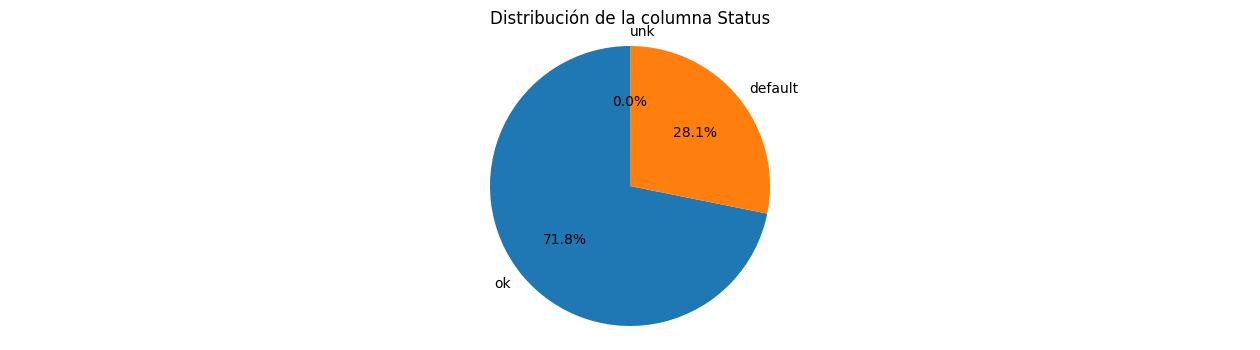

In [490]:
#verficamos la distribuión de status
status_counts = dataset['status'].value_counts()

# Creamos el gráfico pizza
plt.figure(figsize=(16, 4))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90) #mosttramos % y rotamos para q el circulo empiece de arriba
#título
plt.title('Distribución de la columna Status')
# Aseguramos que el círculo sea perfecto
plt.axis('equal')
plt.show()

In [491]:
dataset.status.unique()

array(['ok', 'default', 'unk'], dtype=object)

In [492]:
dataset.status.value_counts()

,count
status,
ok,3199
default,1253
unk,1


In [493]:
unk =dataset[dataset.status == 'unk']
unk


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3309,unk,10,private,60,25,single,no,fixed,35,148,3000,0,1500,1888


In [494]:
#cambiaremos el estado de esta fila q es la unca con unk
#buscamos con loc, la fila donde la busqueda de unk sea True, solo tomando la columna status, añadimos el nuevo valor q sera default
dataset.loc[dataset['status'] == 'unk', 'status'] = 'default'


In [495]:
#verificamos que ahora sea False
unk =dataset[dataset.status == 'unk']
unk

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price


In [496]:
dataset.status.value_counts()

,count
status,
ok,3199
default,1254


In [497]:
#creamos una nueva columna que contendra el default en tipo númerico
dataset['default'] = np.where(dataset['status'].str.lower() == 'default', 1, 0)
dataset.head()
#default = 1
#ok = 0

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [498]:
#eliminamos status
del dataset['status']
dataset.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [499]:
#reordeno  las columnas
dataset = dataset[['default', 'seniority', 'home', 'time', 'age', 'marital', 'records', 'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']]
dataset.head()

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [500]:
conteo = dataset.default.value_counts()
porcentajes = dataset.default.value_counts(normalize=True).mul(100).round(2)
total = pd.DataFrame({'Total': conteo, 'Porcentaje': porcentajes})
print(total)

         Total  Porcentaje
default                   
0         3199       71.84
1         1254       28.16


Vemos que de nuestros datos 1254 registros qque representan el 28% de nuestros datos completos son default, o han incumplido.

## Valores Anómalos

Verificamos posibles outliers en nuetros datos

In [501]:
dataset.describe()

,default,seniority,time,age,expenses,income,assets,debt,amount,price
count,4453.000000,4453.000000,4453.000000,4453.000000,4453.000000,4.453000e+03,4.453000e+03,4.453000e+03,4453.000000,4453.000000
mean,0.281608,7.988772,46.435661,37.077925,55.565686,7.636598e+05,1.060812e+06,4.045636e+05,1039.162812,1462.891534
std,0.449834,8.174938,14.655698,10.987312,19.511003,8.705565e+06,1.021984e+07,6.345672e+06,474.600236,628.224253
min,0.000000,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,0.000000,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.000000
50%,0.000000,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,1.000000,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,1.000000,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


<Axes: >

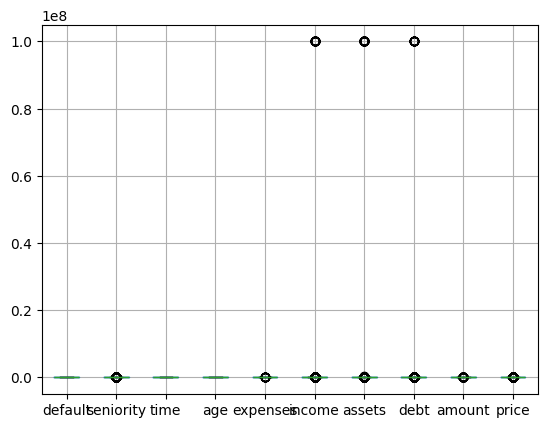

In [502]:
dataset.boxplot()

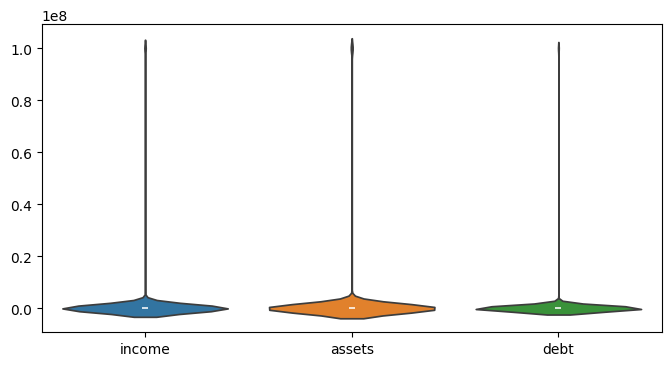

In [503]:
# Crear un gráfico de violín para las tres variables con outliers
plt.figure(figsize=(8, 4))
sns.violinplot(data=dataset[['income', 'assets', 'debt']])

# Mostrar el gráfico
plt.show()

Confirmamos que Income(ngresos), Assets(activos o ahorros) y Debt(obligaciones financieras del solicitane) son las columnas que tienen valores anómalos, asi que vamos a tratarlos

In [504]:
outliers = dataset[dataset.income > 100000]
outliers.head()

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
29,1,0,unk,48,37,single,no,unk,35,99999999,99999999,99999999,1500,1850
393,1,1,owner,36,52,married,yes,freelance,60,99999999,100000,20000,1500,2340
803,0,6,parents,24,25,single,no,fixed,35,99999999,5000,0,850,1480
1306,0,12,owner,36,41,married,no,freelance,60,99999999,10000,0,1000,2100
1420,1,0,owner,60,36,married,yes,freelance,75,99999999,6000,0,1650,1861


Aquí vemos valores que se salen totalmente de lo normal, tomando en cuenta tambien los valores de nuestros datos, lo que significa que pueden ser errores al ingresarlos. Vamos a tratarlos para ello los harémos nulos primero y luego trataremos estos nulos.

In [505]:
#tenemos 34 registros con valores anómalos
outliers.shape[0]

34

In [506]:
#reemplazamos esos valores por nulos
dataset.replace(99999999, np.nan, inplace=True)

In [507]:
#verificamos
outliers = dataset[dataset.income > 100000]
outliers

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price


## Tratando nulos o imputando datos

Despues de reemplazar los valores anómalos por nulos, vamos a tratar estos nulos. Para ello vamos a verificar cuántos registros y en qué columnas exactamente quedaron los nulos y en este caso rellenaremos esos nulos con la media de cada columna.

In [508]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4453 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    4453 non-null   int64  
 1   seniority  4453 non-null   int64  
 2   home       4453 non-null   object 
 3   time       4453 non-null   int64  
 4   age        4453 non-null   int64  
 5   marital    4453 non-null   object 
 6   records    4453 non-null   object 
 7   job        4453 non-null   object 
 8   expenses   4453 non-null   int64  
 9   income     4419 non-null   float64
 10  assets     4406 non-null   float64
 11  debt       4435 non-null   float64
 12  amount     4453 non-null   int64  
 13  price      4453 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 521.8+ KB


In [509]:
#sumamos los nulos de cada columna para saber cuántos tiene cada una
null = dataset.isnull().sum()
null

,0
default,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,34


In [510]:
#seleccionamos las columnas númericas para evitar errores
num_cols = dataset.select_dtypes(include=np.number)

#actualizamos la columnas númericas de nuestra selección en nuestro df con la media de cada columna
dataset[num_cols.columns] = num_cols.fillna(num_cols.mean())
dataset.head()

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [511]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4453 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    4453 non-null   int64  
 1   seniority  4453 non-null   int64  
 2   home       4453 non-null   object 
 3   time       4453 non-null   int64  
 4   age        4453 non-null   int64  
 5   marital    4453 non-null   object 
 6   records    4453 non-null   object 
 7   job        4453 non-null   object 
 8   expenses   4453 non-null   int64  
 9   income     4453 non-null   float64
 10  assets     4453 non-null   float64
 11  debt       4453 non-null   float64
 12  amount     4453 non-null   int64  
 13  price      4453 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 521.8+ KB


## Histogramas de variables

Veremos los histogramas de las columnas númericas para visualizar datos que posiblemente debamos tratar.

In [512]:
#seleccionamos columnas númericas para trabajar solo con esta selección y mitir las categóricas
num_cols = dataset.select_dtypes(include=np.number).columns
num_cols

Index(['default', 'seniority', 'time', 'age', 'expenses', 'income', 'assets',
       'debt', 'amount', 'price'],
      dtype='object')

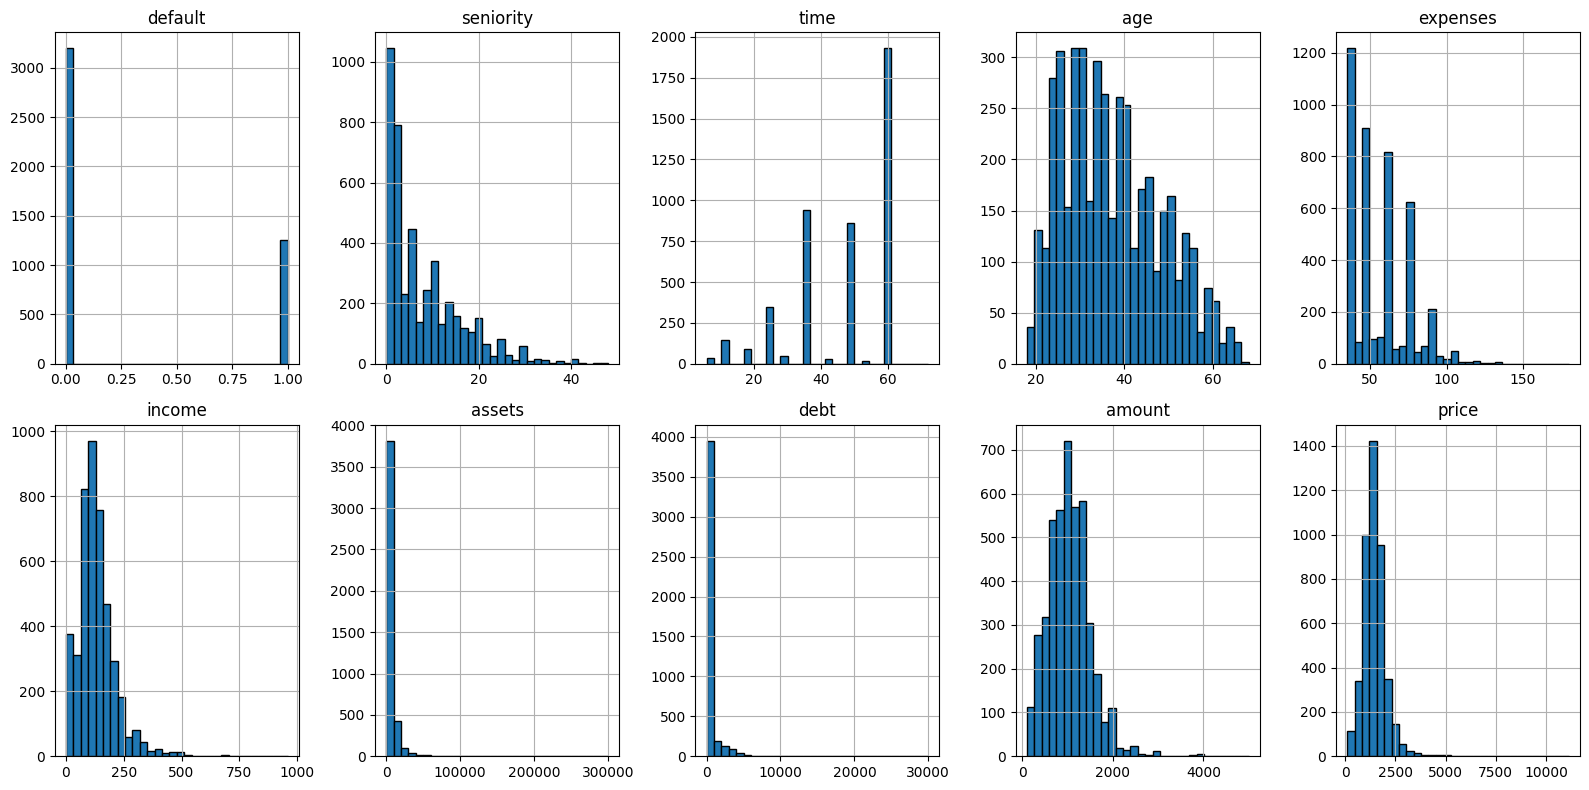

In [513]:
#num_cols = dataset.select_dtypes(include=np.number).columns   #seleccionamos columnas númericas
fig, axes = plt.subplots(2,5, figsize=(16, 8))                      #creamos la gráfica 2 col, 5 filas, especificamos tamaño
ax_flat=axes.flatten()                          #aplanamos para facilitar la iteracción, auqneu al ser de 2 columnas es bidimensioal, lo tratara unidemensional para recorrerlo más facilmente

for i, col in enumerate(num_cols):                     #iteramos
    dataset[col].hist(ax=ax_flat[i], bins=30, edgecolor='black')   #gráficamos
    ax_flat[i].set_title(col)

plt.tight_layout()                                #ajustamos espacios
plt.show()                                        #mostramos

Aqui ya podemos ver la distribucion de valores que tienen estas columnas, para que sea más efectivo trabajar con estos datos realizaremos un truncamiento de valores.

## Truncamiento de Valores atípicos

Según los histogramas tenemos valores inusuales para nuestros datos. Son valores que auqneu pueden ser o más altos o más bajos que la mayoria de datos que tenemos, son muy pocos regiistros asi que no represnetan un valor alto para nuestro modelo por ello vamos a tratarlos haciendo un truncamiento de valores, para este caso usaremos los percentiles 0.05 y 0.99.

Lo que haremos es que lo que sea menor a 0.05 seá tomado com igual a 0.05 para juntar esos datos, y lo que sea mayor a 0.99 lo tomaremos como si fuese 0.99 y asi tambien traeremos esos datos a este rango de valores.

Asi nuestros datos seran más representativos y funcionales para nuestro modelo.

In [514]:
#primero calcularemos los percentiles 95 y 99 de algunas columna para decidir qué porcentaje de datos vamos a truncar
columnas = ['expenses','income', 'assets', 'debt',	'amount',	'price']
limits = {}

#calculamos ambos percentiles
for col in columnas:
  low = dataset[col].quantile(0.05)
  high= dataset[col].quantile(0.99)  # Percentiles a calcular
  limits[col] = (low, high)          #guardamos en el diccionario

pprint (limits)

{'amount': (350.0, 2500.0),
 'assets': (0.0, 50000.0),
 'debt': (0.0, 4773.999999999978),
 'expenses': (35.0, 106.47999999999956),
 'income': (0.0, 428.9599999999991),
 'price': (600.0, 3559.4799999999996)}


In [515]:
# Aplicamos el truncamiento
for col, (low, high) in limits.items():               # para cada columna segun limite inferior y superior dado en el diccioinario
    dataset[col] = np.clip(dataset[col], low, high)   #aplicamos el truncamiento



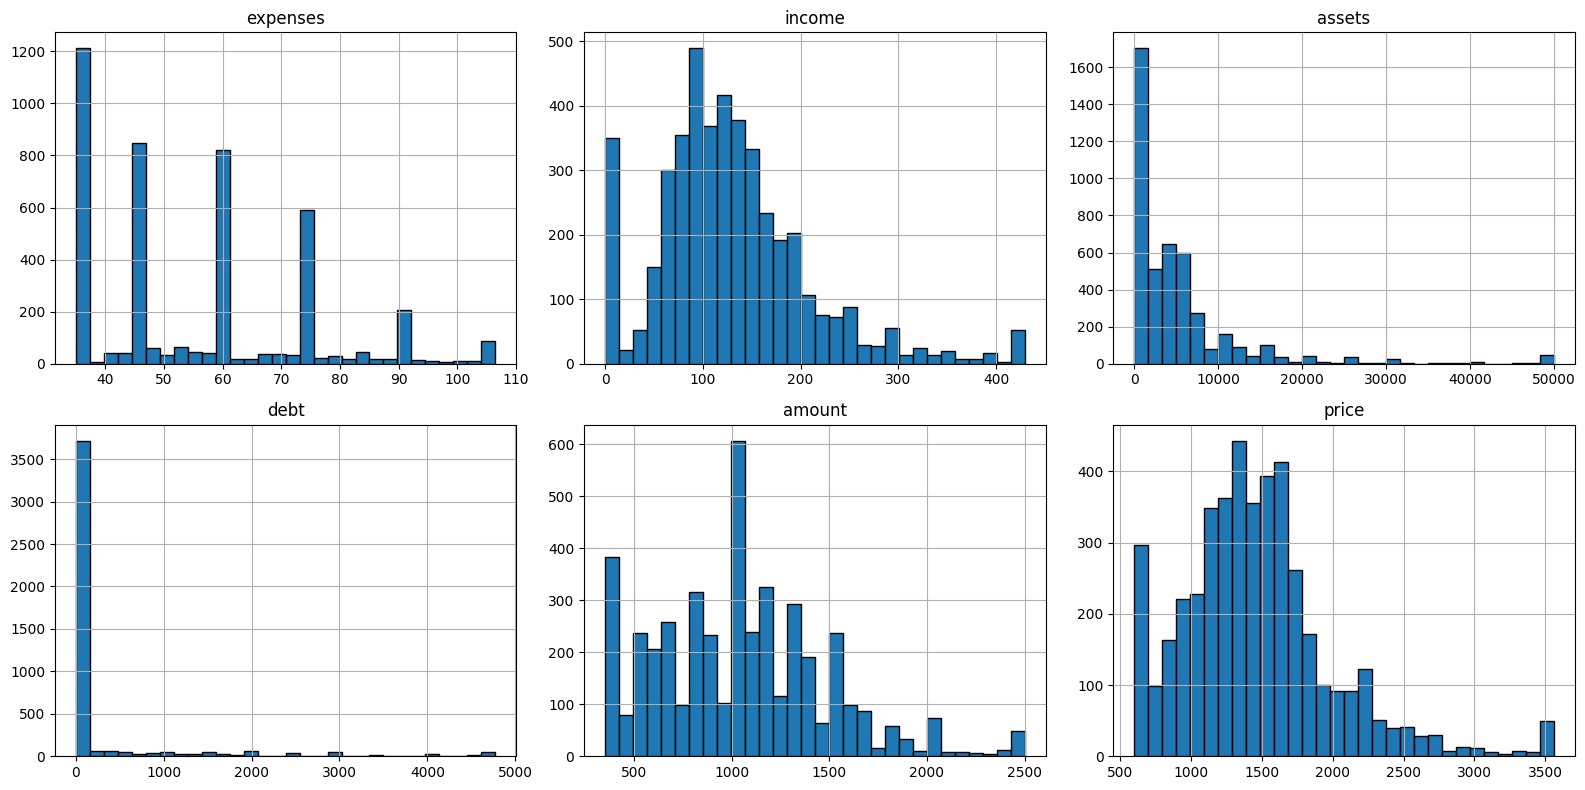

In [516]:
fig, axes = plt.subplots(2,3, figsize=(16, 8))         #creamos la gráfica 2 col, 3 filas, especificamos tamaño
ax_flat=axes.flatten()                                 #aplanamos para facilitar la iteracción, aunque al ser de 2
                                                      #columnas es bidimensioal, lo tratara unidimensional para recorrerlo más facilmente

for i, col in enumerate(columnas):                           #iteramos
    dataset[col].hist(ax=ax_flat[i], bins=30, edgecolor='black')   #gráficamos
    ax_flat[i].set_title(col)

plt.tight_layout()                                           #ajustamos espacios
plt.show()

Aqui ya vemos las gráficas de nuestras columnas depues del truncamiento, se puede notar el cambio de distribución donde ya no tenemos valores atípicos.

## **Descriptivos cualitativos**

Nos enfocamos ahora en las columnas cualitativas, verificaremos sus datos, la frecuencia de estos, la cantidad de valores únicos y asi las trataremos

In [517]:
#seleccionamos la columnas cualitativas o categóricas
col_cuali = dataset.select_dtypes('object')
col_cuali.head()

,home,marital,records,job
0,rent,married,no,freelance
1,rent,widow,no,fixed
2,owner,married,yes,freelance
3,rent,single,no,fixed
4,rent,single,no,fixed


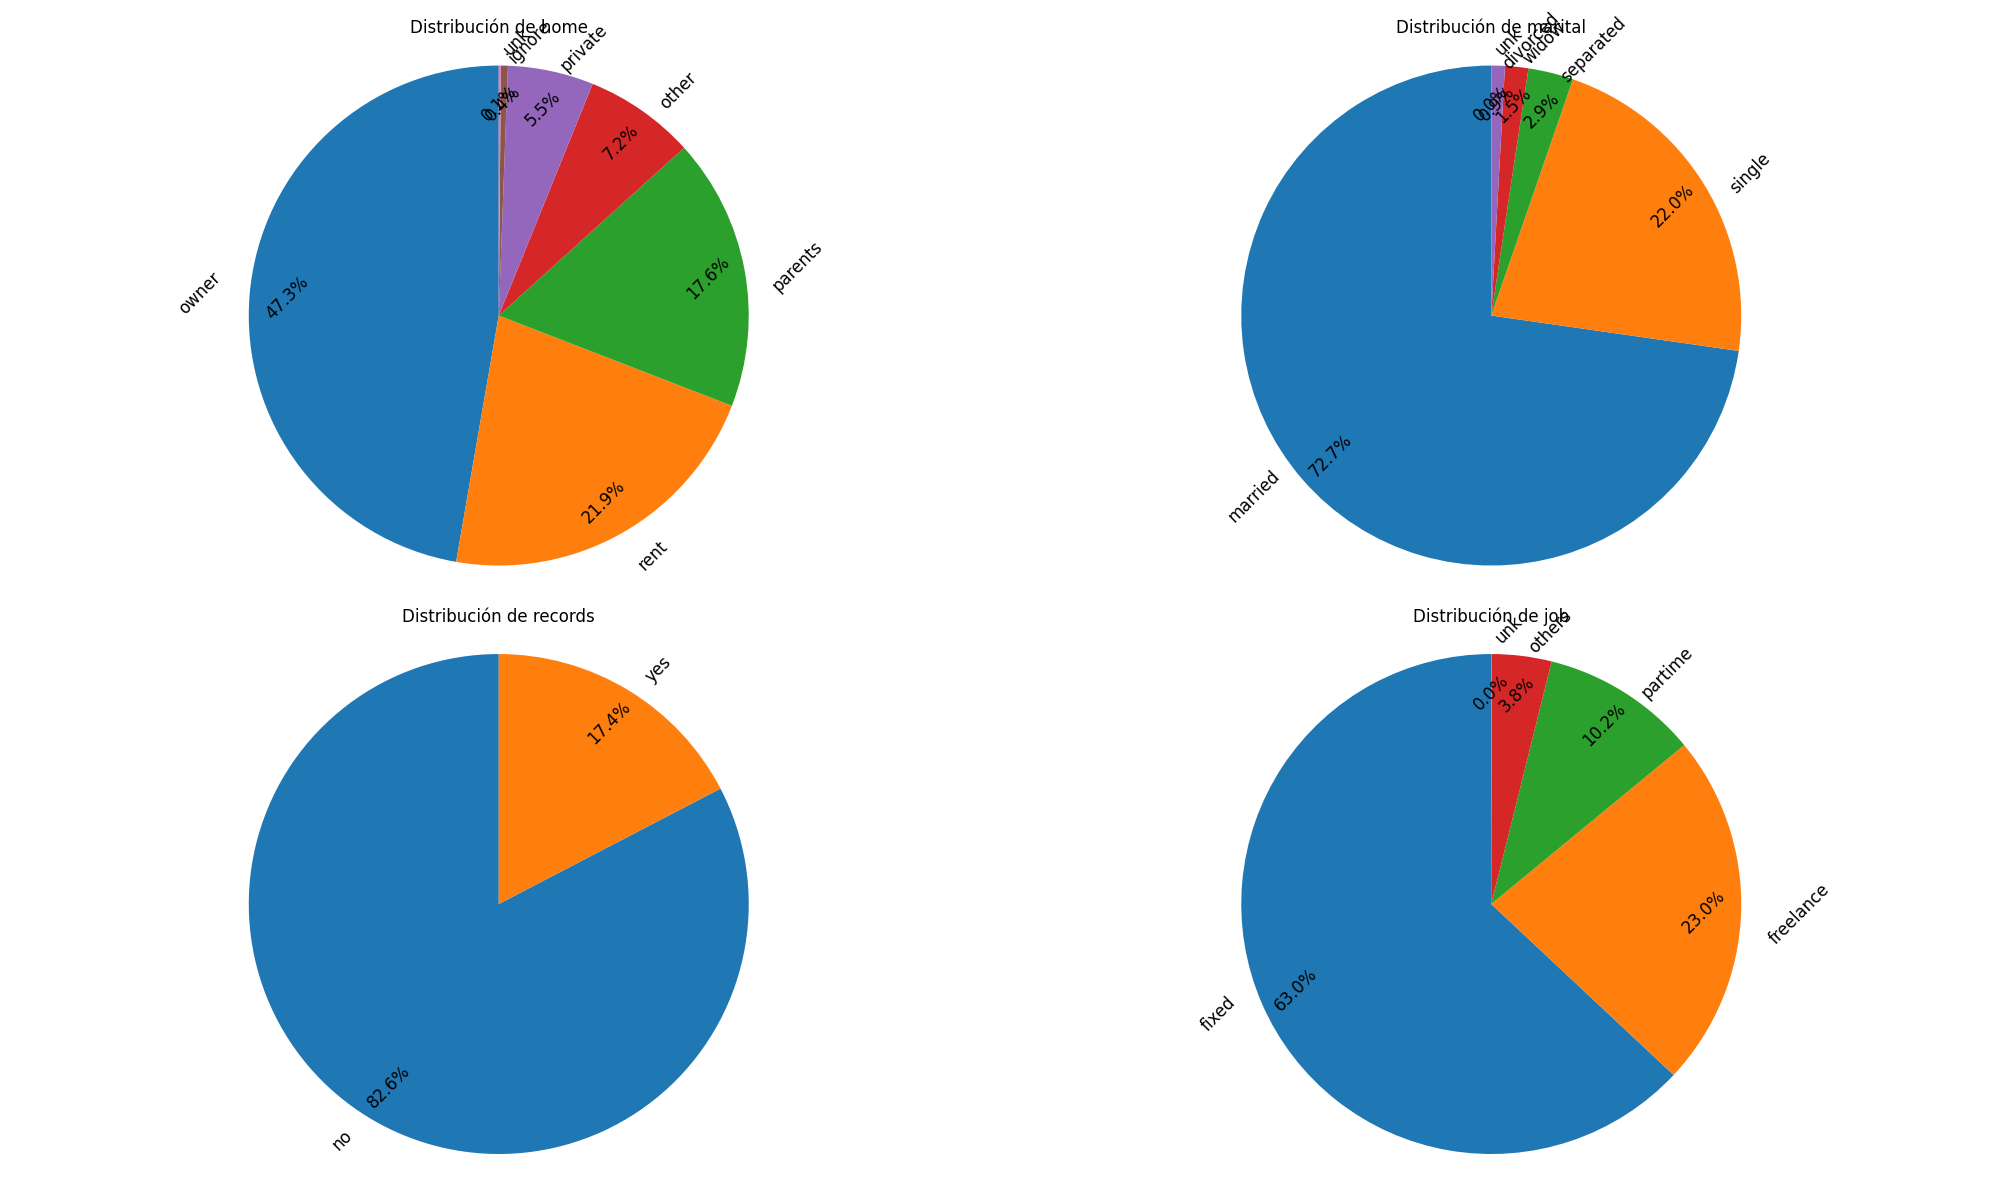

In [518]:
#gráficamos la distribución
cualis = col_cuali.columns          #elegimos las columnas a graficar q ya teniamos definidas
fig, ax = plt.subplots(2,2,figsize=(20,12))      #creamos la fig

i = 0                                           #inciamos el contador en 0


for row in range(2):                             #iteramos por filas
  for col in range(2):                           #iteramos por columnas
    if i < len(cualis):                          # Verificamos no exceder el número de columnas
          counts = col_cuali[cualis[i]].value_counts()     # Obtener los value_counts de la columna actual sgn la iteracion

           #hacemos el grafico de pizza
          ax[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
                           pctdistance=0.85,  # Aleja los porcentajes del centro
                           textprops={'rotation': 45, 'fontsize': 12})  # Aleja las etiquetas del centro


          #título para cada pizza
          ax[row, col].set_title(f'Distribución de {cualis[i]}')
          ax[row, col].axis('equal')                # Aseguramos que el círculo sea perfecto

          #incrementamos el contador
          i += 1


# Ajustar el espaciado entre subplots y mostramos
plt.tight_layout()
plt.show()


## Reagrupando Categorias

Como vimos tenemos categorias con valores muy poco representativos asi que las agruparemos para facilitar la lectura de estos datos.

In [519]:
dataset.home.value_counts()

,count
home,
owner,2105
rent,973
parents,783
other,319
private,247
ignore,20
unk,6


In [520]:
# Reemplazar 'unk' e 'ignore' con 'other'
dataset['home'] = dataset['home'].replace(['unk', 'ignore'], 'other')
dataset.home.value_counts()

,count
home,
owner,2105
rent,973
parents,783
other,345
private,247


In [521]:
dataset.marital.value_counts()

,count
marital,
married,3239
single,978
separated,130
widow,67
divorced,38
unk,1


In [522]:
#reemplzaremos ese registro unk por single
dataset['marital'] = dataset['marital'].replace(['unk'], 'single')
dataset.marital.value_counts()

,count
marital,
married,3239
single,979
separated,130
widow,67
divorced,38


In [523]:
dataset.job.value_counts()

,count
job,
fixed,2806
freelance,1022
partime,452
others,171
unk,2


In [524]:
dataset['job'] = dataset['job'].replace(['unk'], 'others')
dataset.job.value_counts()

,count
job,
fixed,2806
freelance,1022
partime,452
others,173


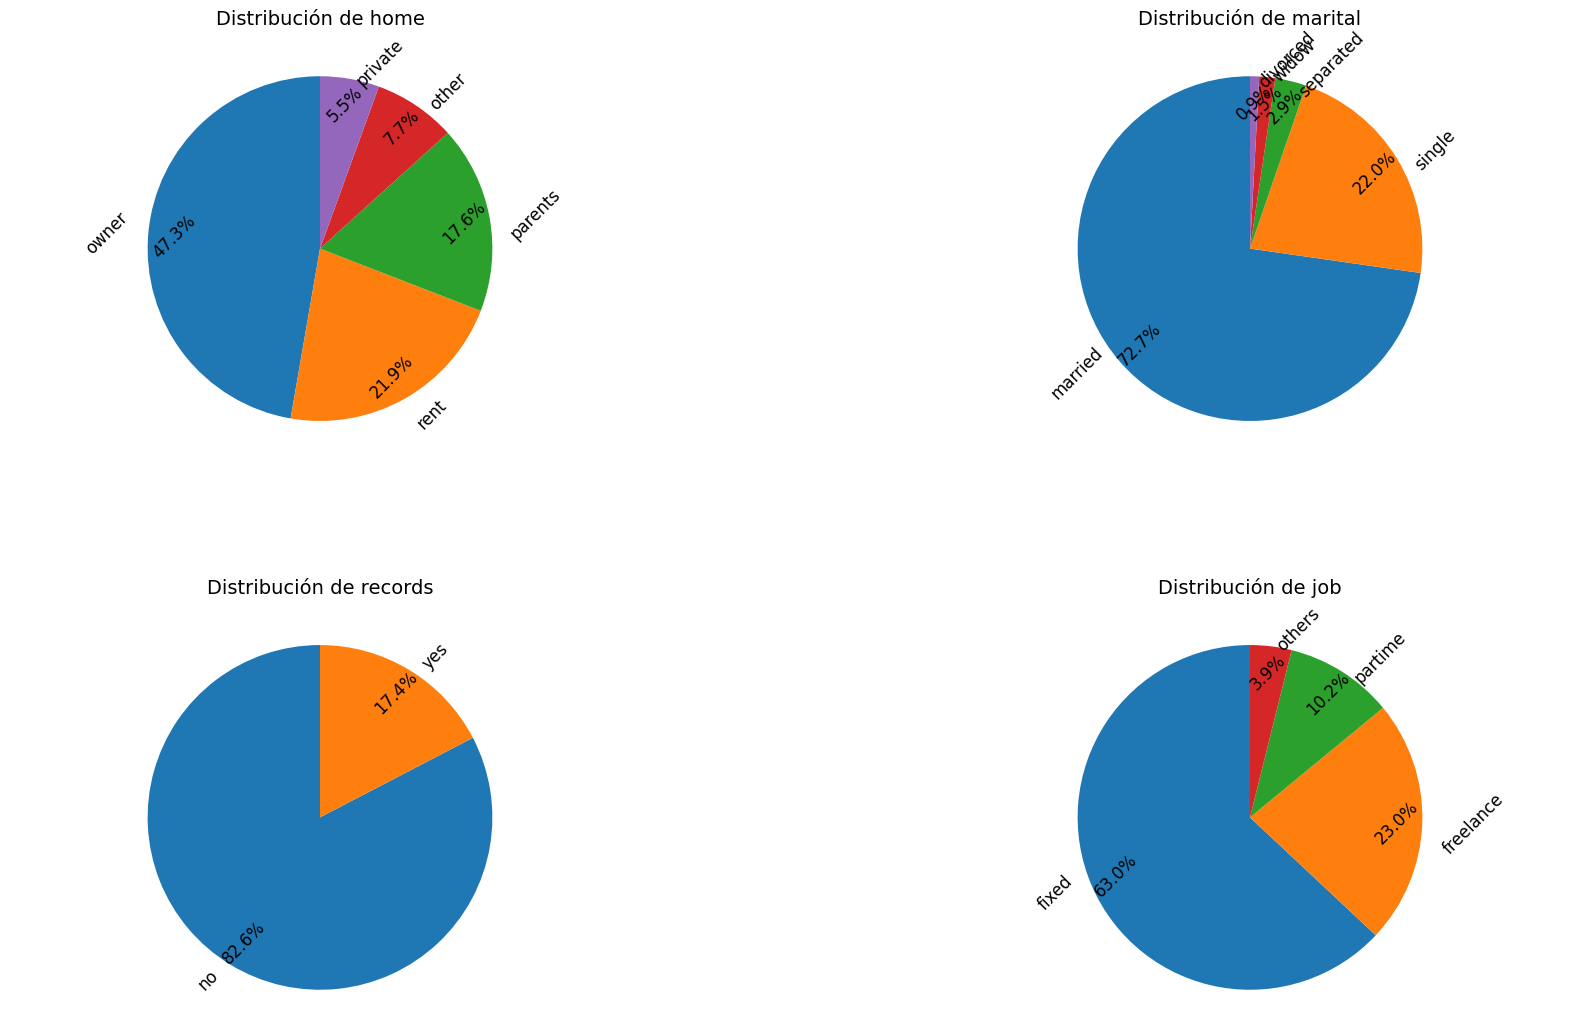

In [525]:
#graficamos de nuevo con la nueva distribución
col_cuali = dataset.select_dtypes('object')
cualis = col_cuali.columns                       #elegimos las columnas a graficar q ya teniamos definidas
fig, ax = plt.subplots(2,2,figsize=(20,12))      #creamos la fig

i = 0                                           #inciamos el contador en 0


for row in range(2):                             #iteramos por filas
  for col in range(2):                           #iteramos por columnas
    if i < len(cualis):                          # Verificamos no exceder el número de columnas
          counts = col_cuali[cualis[i]].value_counts()     # Obtener los value_counts de la columna actual sgn la iteracion

           #hacemos el grafico de pizza
          ax[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
                           pctdistance=0.85,  # Aleja los porcentajes del centro
                           textprops={'rotation': 45, 'fontsize': 12})  # Aleja las etiquetas del centro


          #título para cada pizza
          ax[row, col].set_title(f'Distribución de {cualis[i]}', fontsize=14, pad= 25)

          ax[row, col].axis('equal')                # Aseguramos que el círculo sea perfecto

          #incrementamos el contador
          i += 1


# Ajustar el espaciado entre subplots y mostramos
#plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.5, wspace=0.5)#espaciado superior y subplots
plt.show()

In [526]:
dataset.head()

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800,846.0
1,0,17,rent,60,58,widow,no,fixed,48.0,131.0,0.0,0.0,1000,1658.0
2,1,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000,2985.0
3,0,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900,1325.0
4,0,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,350,910.0


# 2. Exploracion de datos

## Datos númericos

Ahora con las columnas númericas ya tratadas veremos qué datos nos aportan

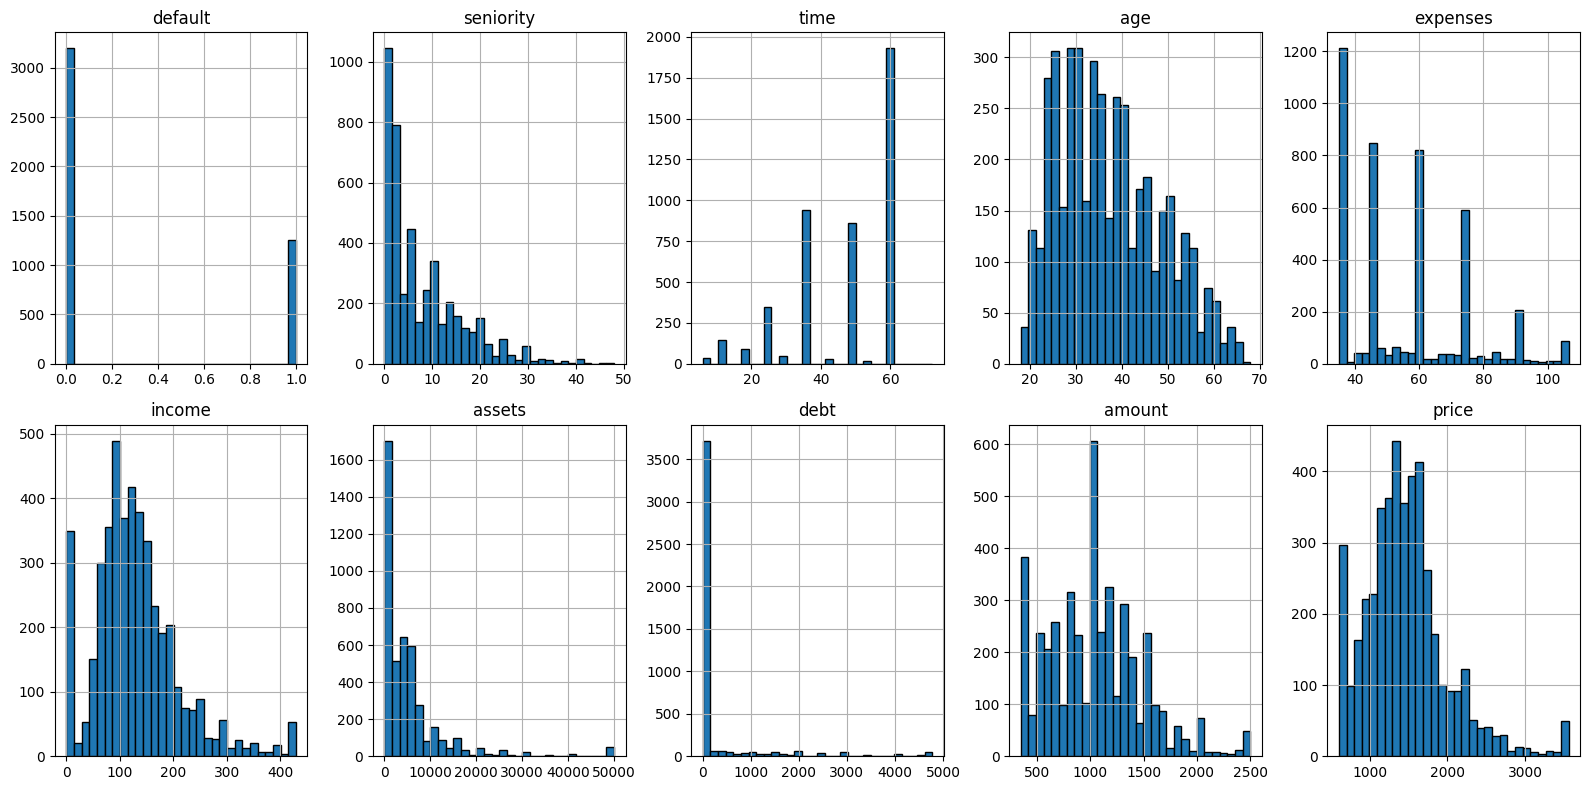

In [527]:
num_cols = dataset.select_dtypes(include=np.number).columns   #seleccionamos columnas númericas
fig, axes = plt.subplots(2,5, figsize=(16, 8))                      #creamos la gráfica 2 col, 5 filas, especificamos tamaño
ax_flat=axes.flatten()                          #aplanamos para facilitar la iteracción, auqneu al ser de 2 columnas es bidimensioal, lo tratara unidemensional para recorrerlo más facilmente

for i, col in enumerate(num_cols):                     #iteramos
    dataset[col].hist(ax=ax_flat[i], bins=30, edgecolor='black')   #gráficamos
    ax_flat[i].set_title(col)

plt.tight_layout()                                #ajustamos espacios
plt.show()

In [528]:
dataset.describe().round(0)

,default,seniority,time,age,expenses,income,assets,debt,amount,price
count,4453.0,4453.0,4453.0,4453.0,4453.0,4453.0,4453.0,4453.0,4453.0,4453.0
mean,0.0,8.0,46.0,37.0,55.0,129.0,5017.0,306.0,1038.0,1457.0
std,0.0,8.0,15.0,11.0,19.0,80.0,7683.0,875.0,442.0,534.0
min,0.0,0.0,6.0,18.0,35.0,0.0,0.0,0.0,350.0,600.0
25%,0.0,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,0.0,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,1.0,12.0,60.0,45.0,72.0,164.0,6000.0,0.0,1300.0,1692.0
max,1.0,48.0,72.0,68.0,106.0,429.0,50000.0,4774.0,2500.0,3559.0


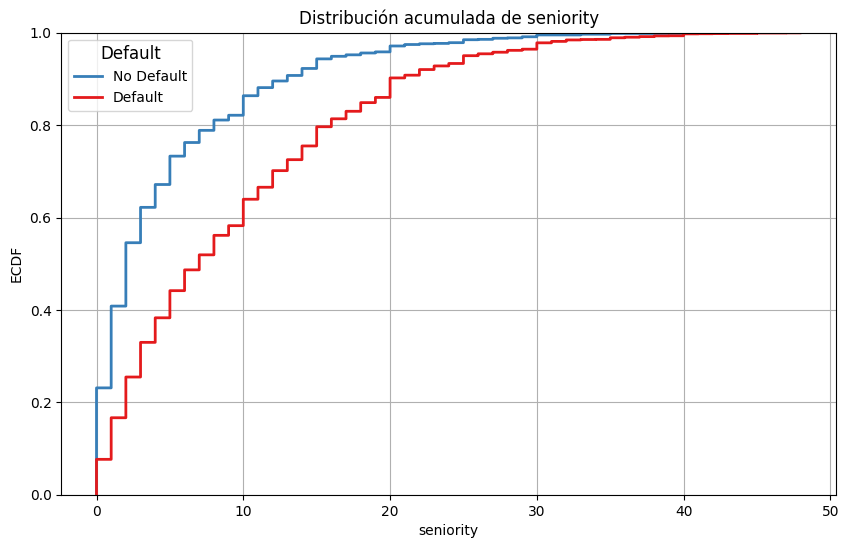

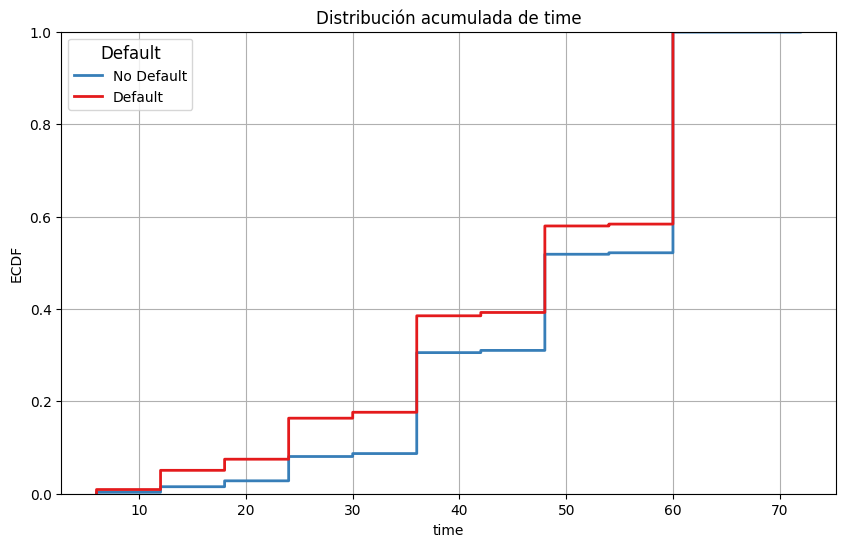

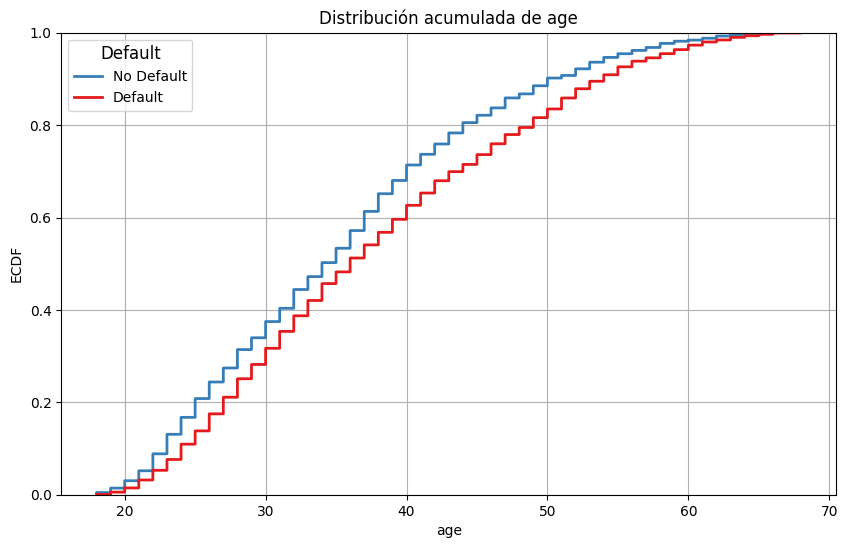

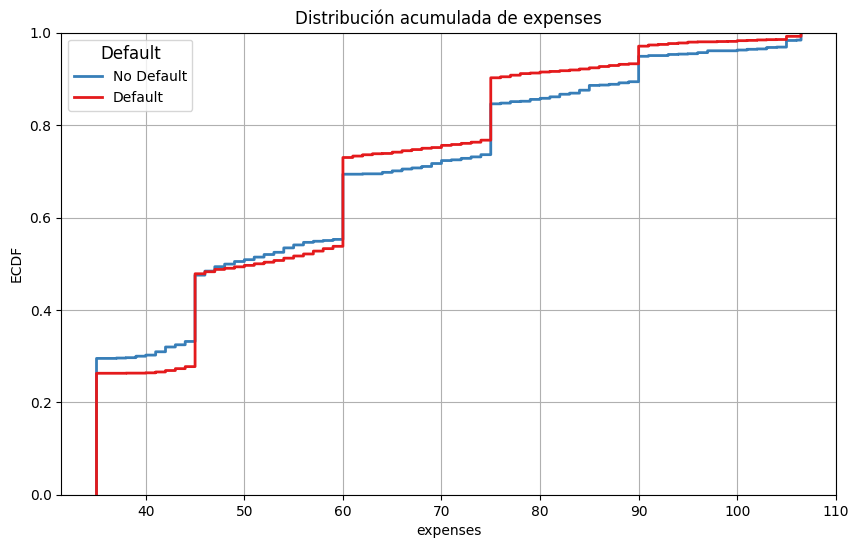

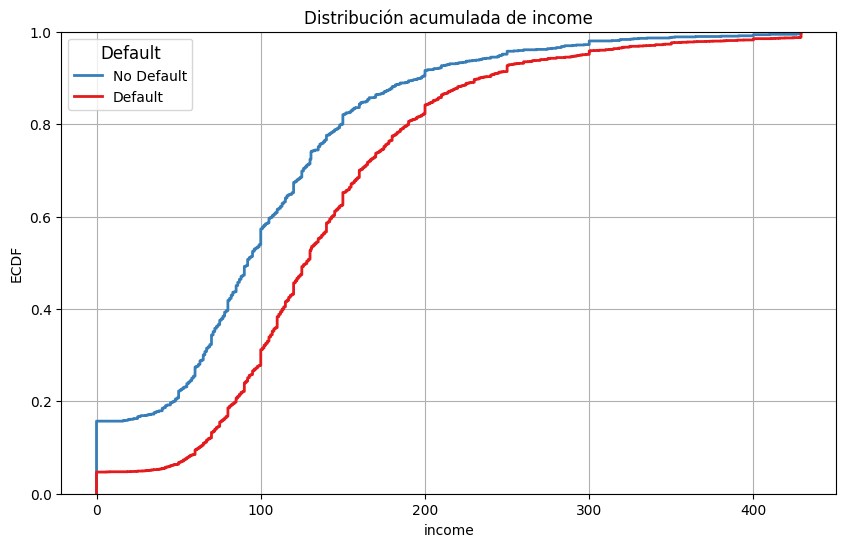

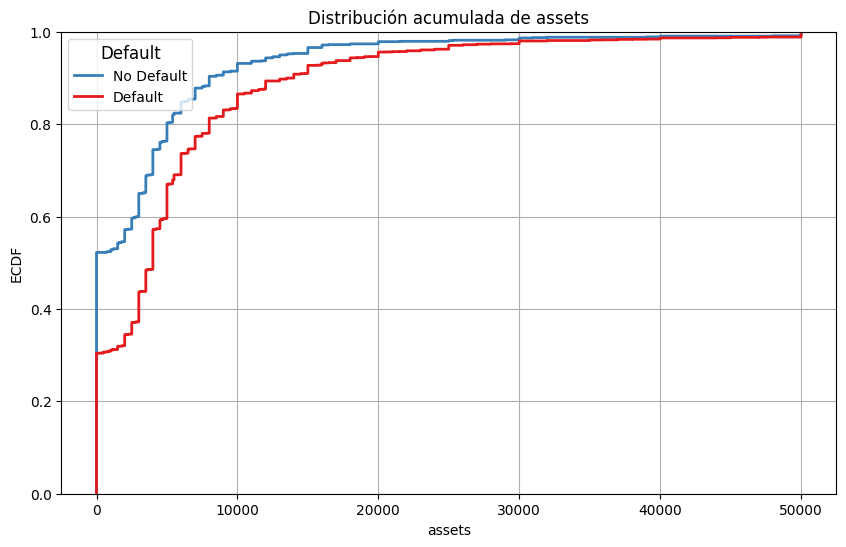

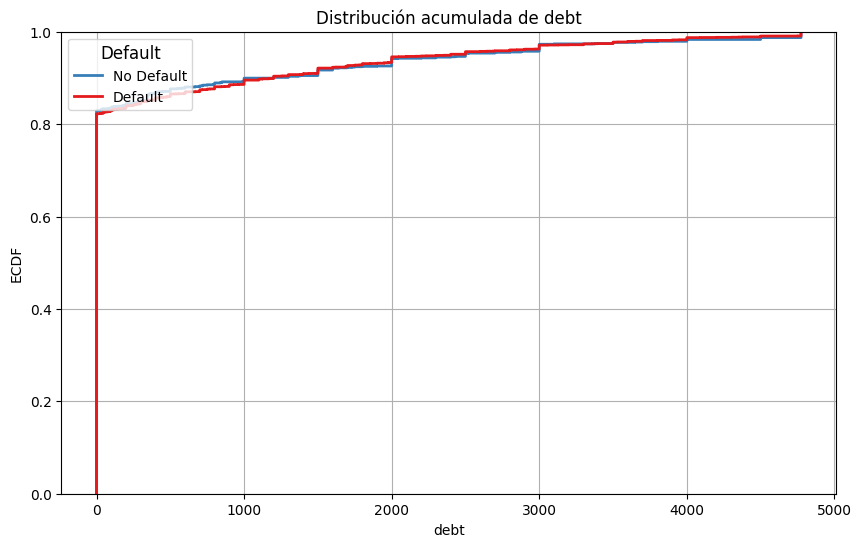

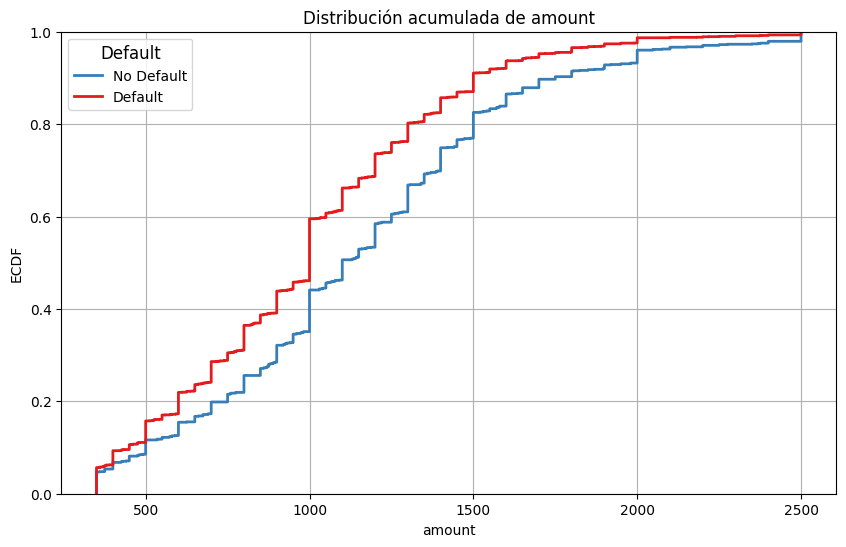

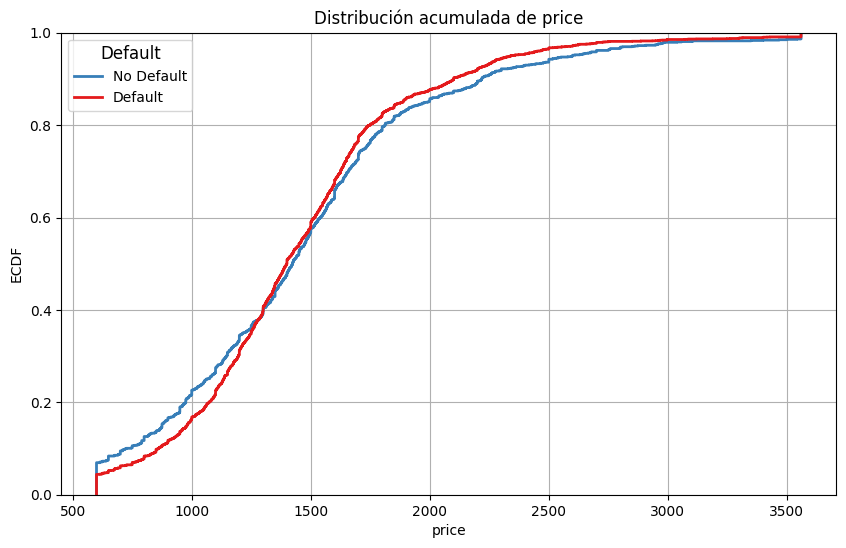

In [529]:
for col in num_cols.drop('default'):
  plt.figure(figsize=(10, 6))
  sns.ecdfplot(data=dataset, x=col, hue='default', palette='Set1',linewidth=2)
  plt.title(f'Distribución acumulada de {col}')
  plt.xlabel(col)
  plt.ylabel('ECDF')
  plt.grid(True)
  plt.legend(
        title='Default',
        labels=['No Default', 'Default'],  # Etiquetas personalizadas
        loc='upper left',  # Posición de la leyenda
        fontsize='medium',  # Tamaño de la fuente
        title_fontsize='large'  # Tamaño de la fuente del título
  )
  plt.savefig(f'ecdf_{col}.png', bbox_inches='tight')
  plt.show()

## Datos cuálitativos - Contribución al Riesgo

En base a las columnas cualitativas ó categóricas recordamos la distribución de sus datos y verificamos la contribución que puede tener cada una al riesgo calculando el riesgo global y por cada categoria.

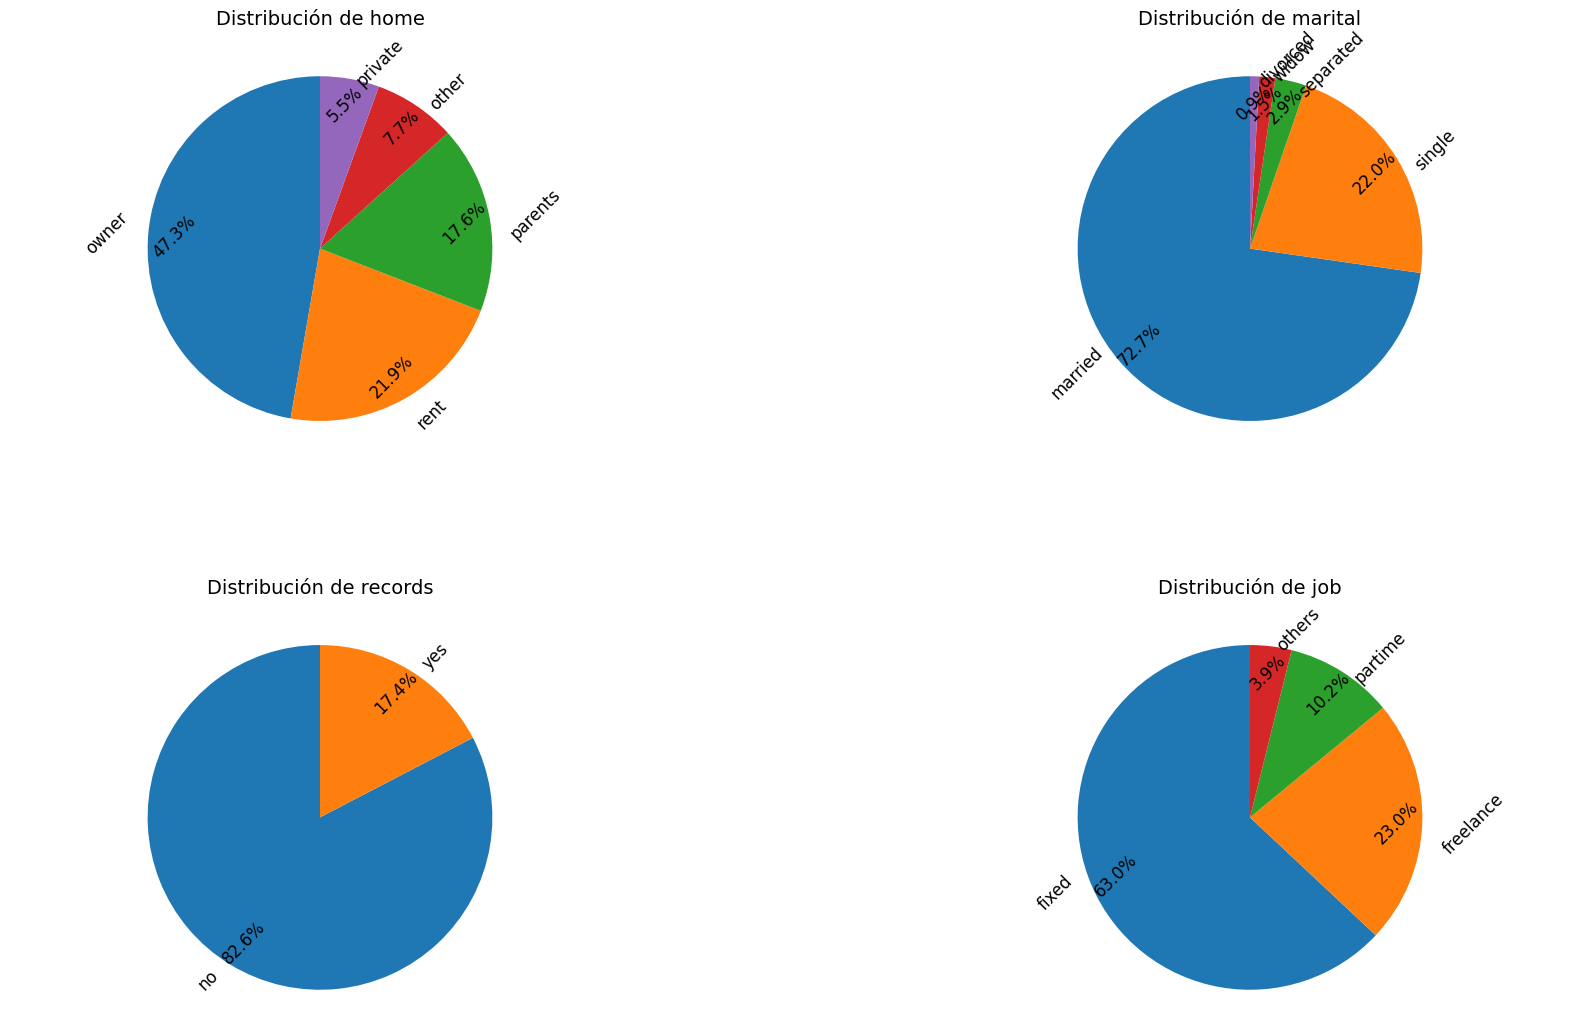

In [530]:
col_cuali = dataset.select_dtypes('object')
cualis = col_cuali.columns                       #elegimos las columnas a graficar q ya teniamos definidas
fig, ax = plt.subplots(2,2,figsize=(20,12))      #creamos la fig

i = 0                                           #inciamos el contador en 0


for row in range(2):                             #iteramos por filas
  for col in range(2):                           #iteramos por columnas
    if i < len(cualis):                          # Verificamos no exceder el número de columnas
          counts = col_cuali[cualis[i]].value_counts()     # Obtener los value_counts de la columna actual sgn la iteracion

           #hacemos el grafico de pizza
          ax[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
                           pctdistance=0.85,  # Aleja los porcentajes del centro
                           textprops={'rotation': 45, 'fontsize': 12})  # Aleja las etiquetas del centro


          #título para cada pizza
          ax[row, col].set_title(f'Distribución de {cualis[i]}', fontsize=14, pad= 25)

          ax[row, col].axis('equal')                # Aseguramos que el círculo sea perfecto

          #incrementamos el contador
          i += 1


# Ajustar el espaciado entre subplots y mostramos
#plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.5, wspace=0.5)#espaciado superior y subplots
plt.show()

## Calculamos y gráficamos el riesgo

Ahora calcularemos el riesgo.

*   Riesgo global:\
Es la proporción de clientes que incumplen (default = 1) en todo el dataset.

*   Riesgo por categoría:\
Es la proporción de clientes que incumplen dentro de cada categoría de una columna categórica.


*   Ratio de riesgo:\
Es el riesgo de una categoría dividido por el riesgo global.
Indica cuánto más (o menos) probable es que una categoría incumpla en comparación con el promedio global.



In [531]:
#seleccionamos columnas categóricas
cat_cols = dataset.select_dtypes(include=['object']).columns

#calclulamos el riesgo global, o sea la media
#la propoción de clientes q incumplen en todos los datos q tenemos
global_risk = dataset['default'].mean()

#función para calcular por categoria y el ratio
def risk_analysis(column):

  #calcular por categoria
  #recordemos que groupby agrupa por los valores unicos de cada columna y asi obtenemos la categoria
  grouped = dataset.groupby(column)['default'].mean()

  #calculamos el ratio
  #Es el riesgo de una categoría dividido por el riesgo global
  risk_ratio = grouped / global_risk

  #devolvemos un df con los datos generados (redondeados y ordenados)
  return (pd.DataFrame({'Risk': grouped.round(4), 'Risk Ratio': risk_ratio.round(4)}) #redondeamos valores
                       .sort_values(by='Risk', ascending=False))                      #organizamos descendientemente

for col in cat_cols:
  #imprimimos el dato de riesgo individual
  print(f'analisís de riesgo para la columna: {col}')

  #ejecutamos la función
  print(risk_analysis(col))
  print("\n" + "="*50 + "\n")  # Separador entre columnas

analisís de riesgo para la columna: home
           Risk  Risk Ratio
home                       
other    0.4609      1.6366
rent     0.3988      1.4160
private  0.3441      1.2220
parents  0.2976      1.0567
owner    0.1848      0.6562


analisís de riesgo para la columna: marital
             Risk  Risk Ratio
marital                      
separated  0.4923      1.7482
divorced   0.3684      1.3083
single     0.3361      1.1934
widow      0.2836      1.0070
married    0.2556      0.9078


analisís de riesgo para la columna: records
           Risk  Risk Ratio
records                    
yes      0.5550      1.9708
no       0.2242      0.7961


analisís de riesgo para la columna: job
             Risk  Risk Ratio
job                          
partime    0.5996      2.1291
others     0.4046      1.4368
freelance  0.3249      1.1536
fixed      0.2071      0.7353




Teniendo ya los datos de cada categoria y el riesgo que representa tener esa categoria en nuestros datos, gráficamos

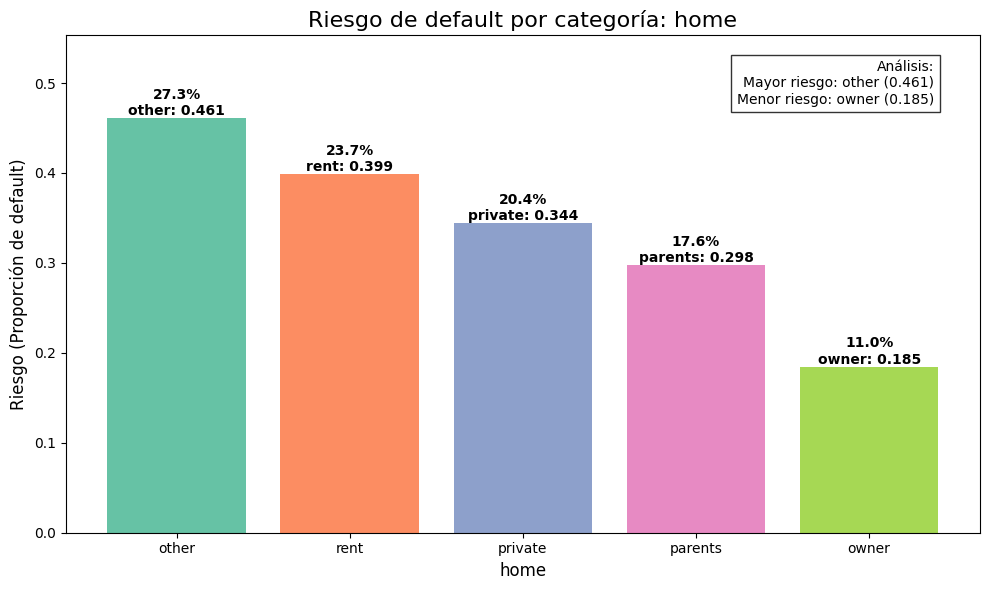

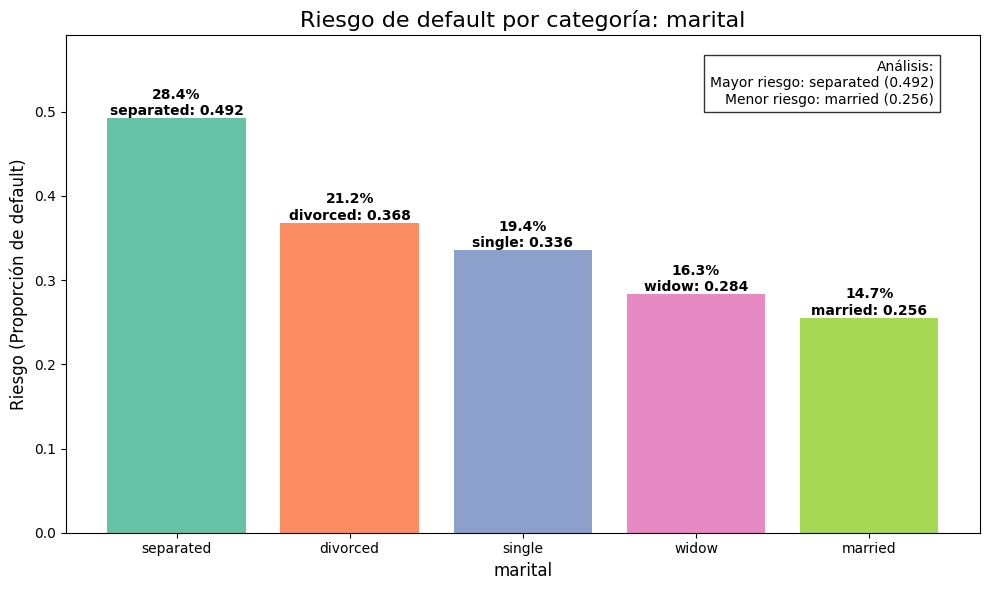

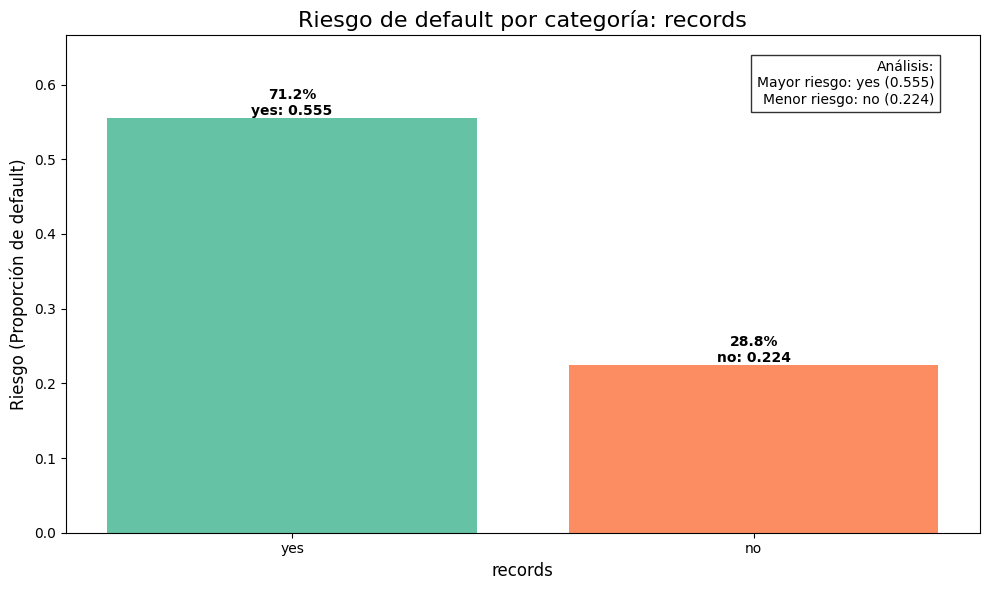

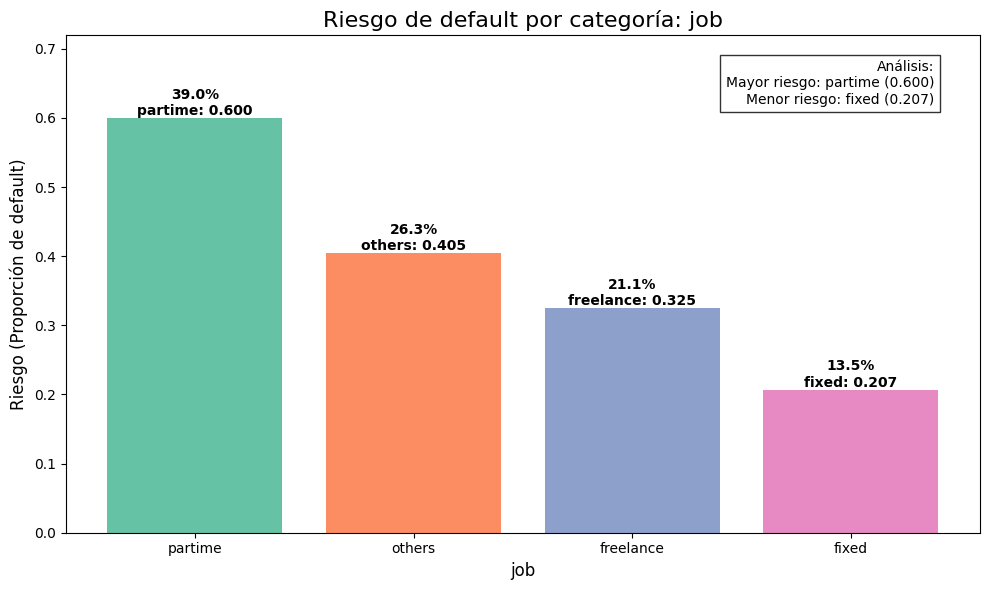

In [532]:
def plot_risk(column):
    grouped = risk_analysis(column)['Risk']
    fig, ax = plt.subplots(figsize=(10, 6))

    # Usar una paleta específica
    colors = sns.color_palette("Set2", len(grouped))  # Ajustamos el número de colores al número de categorías

    # Crear el gráfico
    bars = ax.bar(grouped.index, grouped.values, color=colors)

    # Añadir detalles al gráfico
    ax.set_title(f'Riesgo de default por categoría: {column}', fontsize=16)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Riesgo (Proporción de default)', fontsize=12)
    ax.set_ylim(0, max(grouped.values) * 1.2)  # Ajustar el límite superior del eje y

    # Calcular y añadir porcentajes y análisis
    total = sum(grouped.values)
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = (height / total) * 100
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{percentage:.1f}%\n{grouped.index[i]}: {height:.3f}',
                ha='center', va='bottom', fontweight='bold')

    # Añadir análisis general
    max_category = grouped.idxmax()
    min_category = grouped.idxmin()
    analysis_text = (f"Análisis:\n"
                     f"Mayor riesgo: {max_category} ({grouped[max_category]:.3f})\n"
                     f"Menor riesgo: {min_category} ({grouped[min_category]:.3f})")
    ax.text(0.95, 0.95, analysis_text, transform=ax.transAxes,
            ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Iterar sobre cada columna categórica y graficar el riesgo
for col in cat_cols:
    plot_risk(col)

# Construcción de Modelos

## Transformando Datos

Aqui cambiaremos los datos object por númericos para que el modelo los pueda leer


In [533]:
pd.set_option('display.max_columns', None)
dummies_datos = pd.get_dummies(dataset)
dataset_con_dummies = dummies_datos.astype(int)
dataset_con_dummies.head()

,default,seniority,time,age,expenses,income,assets,debt,amount,price,home_other,home_owner,home_parents,home_private,home_rent,marital_divorced,marital_married,marital_separated,marital_single,marital_widow,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime
0,0,9,60,30,73,129,0,0,800,846,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,0,17,60,58,48,131,0,0,1000,1658,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0
2,1,10,36,46,90,200,3000,0,2000,2985,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,60,24,63,182,2500,0,900,1325,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0,36,26,46,107,0,0,350,910,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [534]:
dataset_con_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4453 entries, 0 to 4454
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   default            4453 non-null   int64
 1   seniority          4453 non-null   int64
 2   time               4453 non-null   int64
 3   age                4453 non-null   int64
 4   expenses           4453 non-null   int64
 5   income             4453 non-null   int64
 6   assets             4453 non-null   int64
 7   debt               4453 non-null   int64
 8   amount             4453 non-null   int64
 9   price              4453 non-null   int64
 10  home_other         4453 non-null   int64
 11  home_owner         4453 non-null   int64
 12  home_parents       4453 non-null   int64
 13  home_private       4453 non-null   int64
 14  home_rent          4453 non-null   int64
 15  marital_divorced   4453 non-null   int64
 16  marital_married    4453 non-null   int64
 17  marital_separated  

In [535]:
#De cada categoria omitiremos other y en el caso de marital: single
dataset_con_dummies.drop(['home_other', 'marital_single', 'job_others'], axis=1, inplace=True)

In [536]:
dataset_con_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4453 entries, 0 to 4454
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   default            4453 non-null   int64
 1   seniority          4453 non-null   int64
 2   time               4453 non-null   int64
 3   age                4453 non-null   int64
 4   expenses           4453 non-null   int64
 5   income             4453 non-null   int64
 6   assets             4453 non-null   int64
 7   debt               4453 non-null   int64
 8   amount             4453 non-null   int64
 9   price              4453 non-null   int64
 10  home_owner         4453 non-null   int64
 11  home_parents       4453 non-null   int64
 12  home_private       4453 non-null   int64
 13  home_rent          4453 non-null   int64
 14  marital_divorced   4453 non-null   int64
 15  marital_married    4453 non-null   int64
 16  marital_separated  4453 non-null   int64
 17  marital_widow      

In [537]:
dataset_con_dummies.shape[1]

23

## Balanceamiento de nuestra variable objetivo

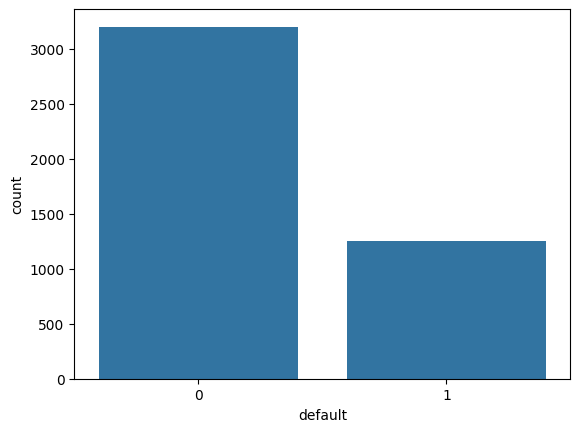

In [538]:
#verficamos el balanceamiento
ax = sns.countplot(x='default', data = dataset_con_dummies)

Aqui tenemos que la mayoria de clientes no han incumplido, pues tienen un default =0.

Balancearemos el dato para ello usaremos... \
***Over_samplin***
usaremos ***SMOTE***

Este va a generar lineas con la clase menor, en este casso 1, y va a crear lineas con pequeñas variaciones en algunas valores para que el resultado sea el mismo pero las variables X sean diferentes. Esto aportará valor al modelo y se utiliza cuando tenemos una clase menor, solo sirve si la diferencia de proporción no es muy extrema. Porque tampoco podemos crear demasiados datos sintéticos ya que seria demasiado falso y allí no aportariamos nada bueno al modelo.

In [539]:
#importamos la biblioteca necesaria
from imblearn.over_sampling import SMOTE

In [540]:
#dividimos nuestros datos
#en x eliminamos u obviamos default ya que es la variable a predecir
x = dataset_con_dummies.drop('default', axis=1)
y = dataset_con_dummies['default']           #y contendrá nuestra variable a predecir

In [541]:
smt = SMOTE(random_state=123)  #semilla
x, y = smt.fit_resample(x, y)  #resample, genera una nueva muestra, nuevos datos

Aquí ya deben tener tanto X y Y las nuevas lineas de código por tanto ya deben estar balanceadas

In [542]:
#unimos los datos y verificamos
datos_final = pd.concat([x, y], axis=1)
datos_final.head()


,seniority,time,age,expenses,income,assets,debt,amount,price,home_owner,home_parents,home_private,home_rent,marital_divorced,marital_married,marital_separated,marital_widow,records_no,records_yes,job_fixed,job_freelance,job_partime,default
0,9,60,30,73,129,0,0,800,846,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,17,60,58,48,131,0,0,1000,1658,0,0,0,1,0,0,0,1,1,0,1,0,0,0
2,10,36,46,90,200,3000,0,2000,2985,1,0,0,0,0,1,0,0,0,1,0,1,0,1
3,0,60,24,63,182,2500,0,900,1325,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0,36,26,46,107,0,0,350,910,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [543]:
datos_final.shape

(6398, 23)

In [544]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   seniority          6398 non-null   int64
 1   time               6398 non-null   int64
 2   age                6398 non-null   int64
 3   expenses           6398 non-null   int64
 4   income             6398 non-null   int64
 5   assets             6398 non-null   int64
 6   debt               6398 non-null   int64
 7   amount             6398 non-null   int64
 8   price              6398 non-null   int64
 9   home_owner         6398 non-null   int64
 10  home_parents       6398 non-null   int64
 11  home_private       6398 non-null   int64
 12  home_rent          6398 non-null   int64
 13  marital_divorced   6398 non-null   int64
 14  marital_married    6398 non-null   int64
 15  marital_separated  6398 non-null   int64
 16  marital_widow      6398 non-null   int64
 17  records_no    

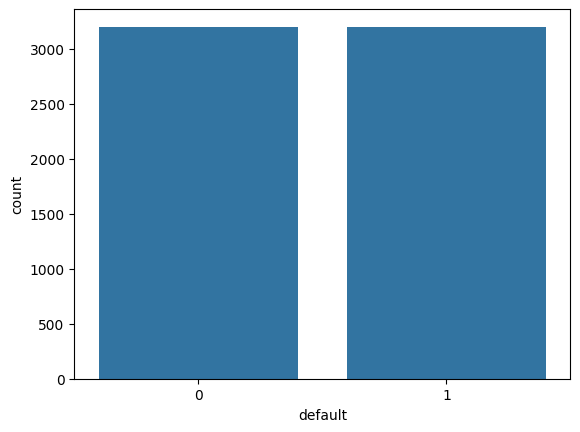

In [545]:
#verificamos el balanceamiento de nuevo
ax = sns.countplot(x='default', data=datos_final)

In [546]:
datos_final.default.value_counts()


,count
default,
0,3199
1,3199


Ya tenemos nuestra variable balanceada por tanto vamos a los modelos

## Dividimos los datos para Test y Train

In [547]:
#definimos variables test y train
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [548]:
# Seleccionar las columnas de tipo booleano
boolean_columns = x.select_dtypes(include='bool').columns

# Convertir las columnas booleanas a enteros
x[boolean_columns] = x[boolean_columns].astype(int)

x.head()
x.shape

(6398, 22)

# Modelos de clasificación

In [549]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_completo = np.concatenate((X_train, X_test), axis=0)


### Comparamos predicciones con los valores reales.

Para ello usaremos algunas métricas que nos permitiran responder

¿El modelo está haciendo predicciones correctas?

¿Cuántos aciertos y errores tiene el modelo?

¿Es lo suficientemente bueno para usarse en un entorno real?

Si tu objetivo es minimizar los falsos negativos, enfócate en recall.

Si tu objetivo es minimizar los falsos positivos, enfócate en precisión.

Si buscas un equilibrio, usa F1-Score.

Si quieres una evaluación general, usa ROC-AUC o el reporte de clasificación.

Matriz de confusión
Muestra los aciertos y errores del modelo desglosados por clase.

Nos permite ver:

True Positives (TP): Predicciones correctas de la clase positiva.

True Negatives (TN): Predicciones correctas de la clase negativa.

False Positives (FP): Predicciones incorrectas de la clase positiva (falsos positivos).

False Negatives (FN): Predicciones incorrectas de la clase negativa (falsos negativos).

En credit scoring, los falsos negativos (FN) son especialmente costosos, ya que representan clientes que incumplirán pero el modelo no los detectó.

Recall (Sensibilidad)
Mide la capacidad del modelo para identificar correctamente los casos positivos.

Fórmula: TP / (TP + FN).

Es útil cuando es importante minimizar los falsos negativos (por ejemplo, en diagnósticos médicos).

Importancia: En credit scoring, es crucial maximizar el recall para minimizar los falsos negativos (clientes que incumplirán pero no fueron detectados).

Precisión (Precision)
Mide la proporción de predicciones positivas que son correctas.

Fórmula: TP / (TP + FP).

Es útil cuando es importante minimizar los falsos positivos (por ejemplo, en detección de spam).

Importancia: Te ayuda a evaluar cuántos de los clientes identificados como incumplidores realmente lo son. Un alto precision significa menos falsos positivos.

 F1-Score
Es una combinación de precisión y recall.

Fórmula: 2 * (Precision * Recall) / (Precision + Recall).

Es útil cuando buscas un equilibrio entre precisión y recall.

Importancia: Es útil cuando buscas un equilibrio entre identificar correctamente los casos de default (recall) y minimizar los falsos positivos (precision).

ROC-AUC (Área bajo la curva ROC)
Mide la capacidad del modelo para distinguir entre las clases default y no default.

La curva ROC grafica la tasa de verdaderos positivos (Recall) contra la tasa de falsos positivos (FPR).

AUC: Un valor cercano a 1 indica un modelo perfecto, mientras que un valor cercano a 0.5 indica un modelo aleatorio.

Importancia: Es especialmente útil cuando las clases están desequilibradas.

## Modelo logit

In [550]:
# Crear el modelo
mod_logic = LogisticRegression()

# Entrenar el modelo
mod_logic.fit(X_train, Y_train)

LogisticRegression()

### Predicciones

In [551]:
#generamos las predicciones para nuestro  conjunto de datos reservado
predic_logic = mod_logic.predict(X_test)
predic_logic


array([1, 1, 1, ..., 0, 0, 1])

In [552]:
pd.crosstab(Y_test, predic_logic,margins=True, rownames=['Real'],
            colnames={'Predicción Modelo'}).rename(columns={0:'Cumple',1:'Incumple'},
                    index={0:'Cumple',1:'Incumple','All':'Total'}
                                                   )


Predicción Modelo,Cumple,Incumple,All
Real,,,
Cumple,852,132,984
Incumple,176,760,936
Total,1028,892,1920


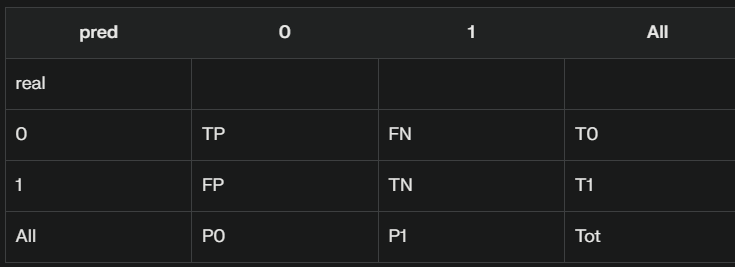


Recordemos que Filas: Representan los valores reales (Y_test).

Columnas: Muestran las predicciones del modelo (predic_logic).

Celdas: Contienen el número de casos para cada combinación de valor real y predicción.

Márgenes: La última fila y columna (etiquetadas como "All") muestran los totales.

La diagonal principal de la tabla representa las predicciones correctas, mientras que las demás celdas son errores de clasificación

### Evaluación del modelo

In [553]:
def evaluar_modelo(Y_test, predic_logic, y_pred_proba=None, titulo="Evaluación del Modelo"):
    """
    Evalúa el rendimiento de un modelo de clasificación.

    Parámetros:
    - Y_test: Etiquetas reales.
    - predic_logic: Etiquetas predichas.
    - titulo: Título para la gráfica de la matriz de confusión.
    """
    # Matriz de confusión
    conf_matrix = confusion_matrix(Y_test, predic_logic)
    conf_matrix_df = pd.DataFrame(conf_matrix,
                                  index=["Real 0", "Real 1"],
                                  columns=["Predicho 0", "Predicho 1"])

    # Gráfica de la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title(titulo)
    plt.show()

    # Métricas individuales
    precision = precision_score(Y_test, predic_logic)
    recall = recall_score(Y_test, predic_logic)
    f1 = f1_score(Y_test, predic_logic)

    print(f'Precisión (Precision): {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')

    # Reporte de clasificación
    print("Reporte de clasificación:")
    print(classification_report(Y_test, predic_logic))

      # Curva ROC (si se proporcionan probabilidades)
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
        roc_auc = roc_auc_score(Y_test, y_pred_proba)

         # Imprimir el valor del AUC
        print(f'AUC (Área bajo la curva ROC): {roc_auc:.2f}')

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

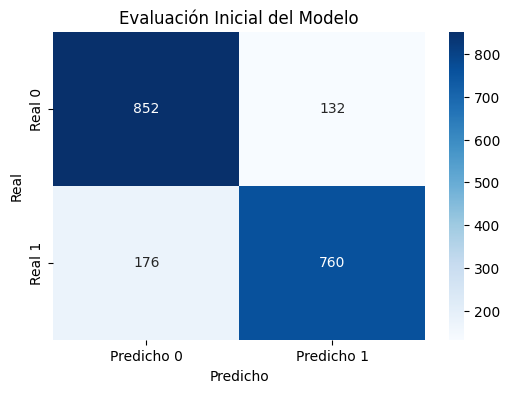

Precisión (Precision): 0.85
Recall: 0.81
F1-Score: 0.83
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       984
           1       0.85      0.81      0.83       936

    accuracy                           0.84      1920
   macro avg       0.84      0.84      0.84      1920
weighted avg       0.84      0.84      0.84      1920

AUC (Área bajo la curva ROC): 0.92


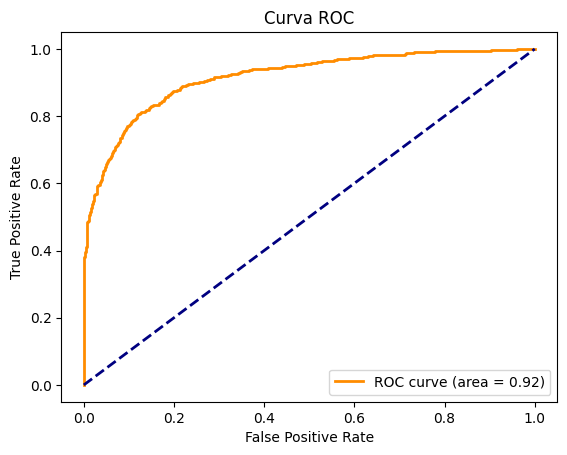

In [554]:
# Obtener probabilidades predichas
y_pred_proba = mod_logic.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

#llamamos a la función
# Evaluar el modelo con probabilidades y curva ROC
evaluar_modelo(Y_test, predic_logic, y_pred_proba=y_pred_proba, titulo="Evaluación Inicial del Modelo")

### Umbral optimo

Umbral óptimo: 0.5120342741447097


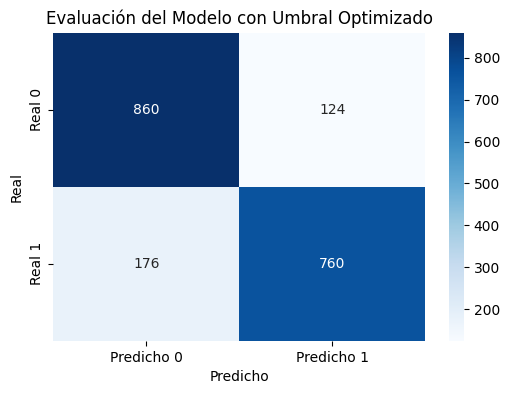

Precisión (Precision): 0.86
Recall: 0.81
F1-Score: 0.84
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       984
           1       0.86      0.81      0.84       936

    accuracy                           0.84      1920
   macro avg       0.84      0.84      0.84      1920
weighted avg       0.84      0.84      0.84      1920

AUC (Área bajo la curva ROC): 0.92


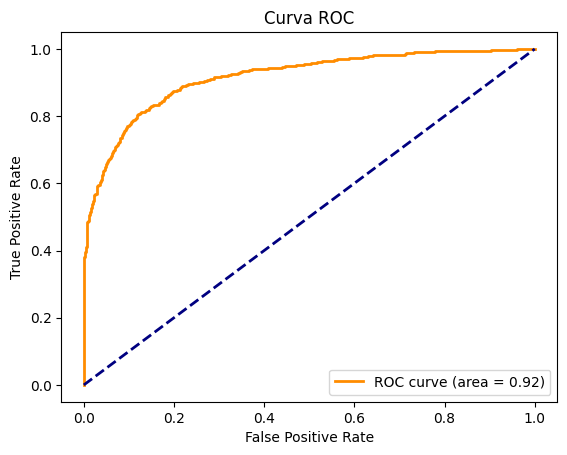

In [555]:
# Calcular fpr, tpr, y thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Encontrar el umbral óptimo (donde TPR - FPR es máximo)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Umbral óptimo: {optimal_threshold}')

# Aplicar el umbral óptimo para clasificar
predic_logic2 = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluar el modelo con el nuevo umbral
evaluar_modelo(Y_test, predic_logic2, y_pred_proba=y_pred_proba, titulo="Evaluación del Modelo con Umbral Optimizado")

In [556]:
print("Tabla de contingencia después del corte óptimo:")
pd.crosstab(Y_test, predic_logic2,margins=True, rownames=['Real'],
            colnames={'Predicción Modelo'}).rename(columns={0:'Cumple',1:'Incumple'},
                    index={0:'Cumple',1:'Incumple','All':'Total'}
                                                   )


Tabla de contingencia después del corte óptimo:


Predicción Modelo,Cumple,Incumple,All
Real,,,
Cumple,860,124,984
Incumple,176,760,936
Total,1036,884,1920


### Score Modelo Logic

In [557]:
"""# Función para graficar el histograma apilado
def hist_fill_p(y_test, scaled_scores, bins=10):
    # Crear un DataFrame con los scores y las etiquetas
    df_hist = pd.DataFrame({'score': scaled_scores, 'default': y_test})

    # Crear rangos (bins) para los scores
    df_hist['rangos'] = pd.cut(df_hist['score'], bins=bins)

    # Calcular las sumas por rango
    row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count', observed=False).sum(axis=1)

    # Crear la figura y los ejes
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico 1: Conteo de observaciones por rango y default
    df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count', observed=False).plot(kind='bar', stacked=True, ax=ax[0])
    ax[0].set_title('Distribución de Scores por Default (Conteo)')
    ax[0].set_xlabel('Rangos de Score')
    ax[0].set_ylabel('Conteo')

    # Gráfico 2: Proporción de observaciones por rango y default
    df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count', observed=False).div(row_sums, axis=0).plot(kind='bar', stacked=True, ax=ax[1])
    ax[1].set_title('Distribución de Scores por Default (Proporción)')
    ax[1].set_xlabel('Rangos de Score')
    ax[1].set_ylabel('Proporción')

    plt.tight_layout()
    plt.show()

# Asignar los scores (por ejemplo, probabilidades predichas por un modelo)
dataset['score_logit'] = mod_logic.predict_proba(X_completo)[:, 1]  # Reemplaza "model" y "X" con tus datos

# Llamar a la función para graficar
hist_fill_p(dataset['default'], dataset['score_logit'], bins=10)
"""

'# Función para graficar el histograma apilado\ndef hist_fill_p(y_test, scaled_scores, bins=10):\n    # Crear un DataFrame con los scores y las etiquetas\n    df_hist = pd.DataFrame({\'score\': scaled_scores, \'default\': y_test})\n\n    # Crear rangos (bins) para los scores\n    df_hist[\'rangos\'] = pd.cut(df_hist[\'score\'], bins=bins)\n\n    # Calcular las sumas por rango\n    row_sums = df_hist.pivot_table(index=\'rangos\', columns=\'default\', values=\'score\', aggfunc=\'count\', observed=False).sum(axis=1)\n\n    # Crear la figura y los ejes\n    fig, ax = plt.subplots(1, 2, figsize=(14, 6))\n\n    # Gráfico 1: Conteo de observaciones por rango y default\n    df_hist.pivot_table(index=\'rangos\', columns=\'default\', values=\'score\', aggfunc=\'count\', observed=False).plot(kind=\'bar\', stacked=True, ax=ax[0])\n    ax[0].set_title(\'Distribución de Scores por Default (Conteo)\')\n    ax[0].set_xlabel(\'Rangos de Score\')\n    ax[0].set_ylabel(\'Conteo\')\n\n    # Gráfico 2: Pro

## Modelo ärbol

In [558]:
# creamos y Entrenamos el modelo
mod_arbol = DecisionTreeClassifier()
mod_arbol.fit(X_train, Y_train)


DecisionTreeClassifier()

### Predicciones

In [559]:
#generamos las predicciones para nuestro  conjunto de datos reservado
predic_arbol = mod_arbol.predict(X_test)
predic_arbol

array([1, 1, 1, ..., 0, 1, 0])

In [560]:
pd.crosstab(Y_test, predic_arbol,margins=True, rownames=['Real'],
            colnames={'Predicción Modelo'}).rename(columns={0:'Cumple',1:'Incumple'},
                    index={0:'Cumple',1:'Incumple','All':'Total'}
                                                   )

Predicción Modelo,Cumple,Incumple,All
Real,,,
Cumple,778,206,984
Incumple,195,741,936
Total,973,947,1920


In [561]:
def evaluar_modelo(Y_test, predic_arbol, y_pred_proba_arbol=None, titulo="Evaluación del Modelo"):
    """
    Evalúa el rendimiento de un modelo de clasificación.

    Parámetros:
    - Y_test: Etiquetas reales.
    - predic_arbol: Etiquetas predichas.
    - titulo: Título para la gráfica de la matriz de confusión.
    """
    # Matriz de confusión
    conf_matrix = confusion_matrix(Y_test, predic_arbol)
    conf_matrix_df = pd.DataFrame(conf_matrix,
                                  index=["Real 0", "Real 1"],
                                  columns=["Predicho 0", "Predicho 1"])

    # Gráfica de la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title(titulo)
    plt.show()

    # Métricas individuales
    precision = precision_score(Y_test, predic_arbol)
    recall = recall_score(Y_test, predic_arbol)
    f1 = f1_score(Y_test, predic_arbol)

    print(f'Precisión (Precision): {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')

    # Reporte de clasificación
    print("Reporte de clasificación:")
    print(classification_report(Y_test, predic_arbol))

      # Curva ROC (si se proporcionan probabilidades)
    if y_pred_proba_arbol is not None:
        fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_arbol)
        roc_auc = roc_auc_score(Y_test, y_pred_proba_arbol)

         # Imprimir el valor del AUC
        print(f'AUC (Área bajo la curva ROC): {roc_auc:.2f}')

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

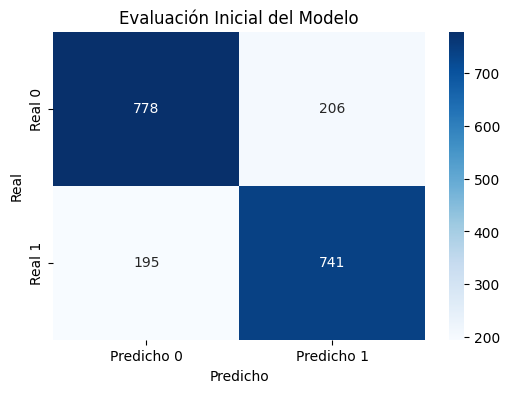

Precisión (Precision): 0.78
Recall: 0.79
F1-Score: 0.79
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       984
           1       0.78      0.79      0.79       936

    accuracy                           0.79      1920
   macro avg       0.79      0.79      0.79      1920
weighted avg       0.79      0.79      0.79      1920

AUC (Área bajo la curva ROC): 0.79


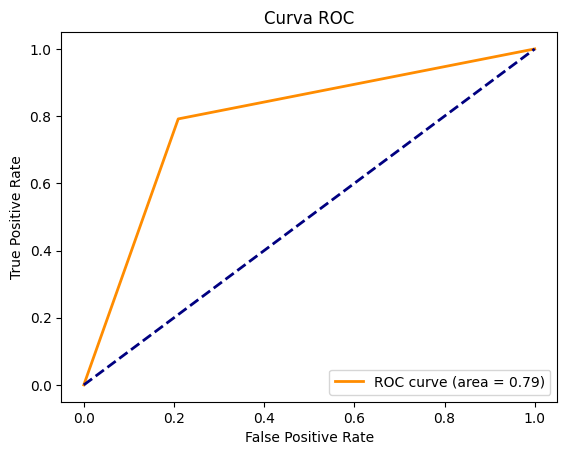

In [562]:
# Obtener probabilidades predichas
y_pred_proba_arbol = mod_arbol.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

#llamamos a la función
# Evaluar el modelo con probabilidades y curva ROC
evaluar_modelo(Y_test, predic_arbol, y_pred_proba_arbol=y_pred_proba_arbol, titulo="Evaluación Inicial del Modelo")

### Úmbral óptimo

Umbral óptimo: 1.0


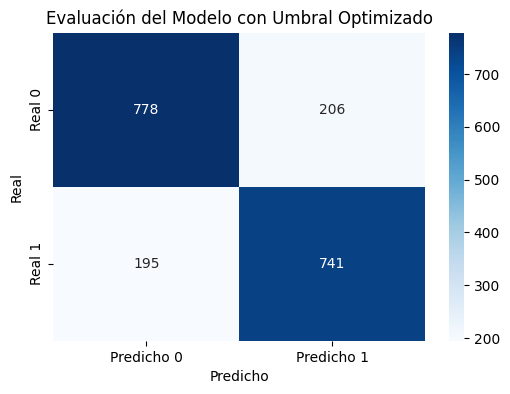

Precisión (Precision): 0.78
Recall: 0.79
F1-Score: 0.79
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       984
           1       0.78      0.79      0.79       936

    accuracy                           0.79      1920
   macro avg       0.79      0.79      0.79      1920
weighted avg       0.79      0.79      0.79      1920

AUC (Área bajo la curva ROC): 0.79


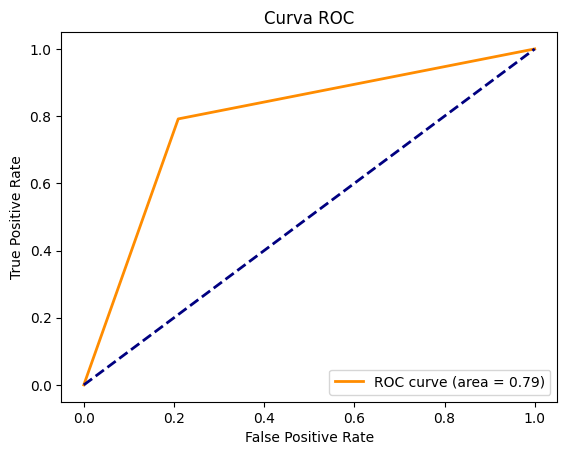

In [563]:
# Calcular fpr, tpr, y thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_arbol)

# Encontrar el umbral óptimo (donde TPR - FPR es máximo)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Umbral óptimo: {optimal_threshold}')

# Aplicar el umbral óptimo para clasificar
predic_arbol2 = (y_pred_proba_arbol >= optimal_threshold).astype(int)

# Evaluar el modelo con el nuevo umbral
evaluar_modelo(Y_test, predic_arbol2, y_pred_proba_arbol=y_pred_proba_arbol, titulo="Evaluación del Modelo con Umbral Optimizado")

In [572]:
pd.crosstab(Y_test, predic_arbol2,margins=True, rownames=['Real'],
            colnames={'Predicción Modelo'}).rename(columns={0:'Cumple',1:'Incumple'},
                    index={0:'Cumple',1:'Incumple','All':'Total'}
                                                   )

Predicción Modelo,Cumple,Incumple,All
Real,,,
Cumple,778,206,984
Incumple,195,741,936
Total,973,947,1920


### Scoring Modelo árbol

# Ramdom Forest

In [565]:
# creamos y Entrenamos el modelo
mod_forest = RandomForestClassifier()
mod_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [566]:
#generamos las predicciones para nuestro  conjunto de datos reservado
predic_forest = mod_forest.predict(X_test)
predic_forest

array([1, 1, 1, ..., 0, 0, 0])

In [567]:
pd.crosstab(Y_test, predic_forest,margins=True, rownames=['Real'],
            colnames={'Predicción Modelo'}).rename(columns={0:'Cumple',1:'Incumple'},
                    index={0:'Cumple',1:'Incumple','All':'Total'}
                                                   )

Predicción Modelo,Cumple,Incumple,All
Real,,,
Cumple,857,127,984
Incumple,146,790,936
Total,1003,917,1920


In [568]:
def evaluar_modelo(Y_test, predic_forest, y_pred_proba_forest=None, titulo="Evaluación del Modelo"):
    """
    Evalúa el rendimiento de un modelo de clasificación.

    Parámetros:
    - Y_test: Etiquetas reales.
    - predic_forest: Etiquetas predichas.
    - titulo: Título para la gráfica de la matriz de confusión.
    """
    # Matriz de confusión
    conf_matrix = confusion_matrix(Y_test, predic_forest)
    conf_matrix_df = pd.DataFrame(conf_matrix,
                                  index=["Real 0", "Real 1"],
                                  columns=["Predicho 0", "Predicho 1"])

    # Gráfica de la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title(titulo)
    plt.show()

    # Métricas individuales
    precision = precision_score(Y_test, predic_forest)
    recall = recall_score(Y_test, predic_forest)
    f1 = f1_score(Y_test, predic_forest)

    print(f'Precisión (Precision): {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')

    # Reporte de clasificación
    print("Reporte de clasificación:")
    print(classification_report(Y_test, predic_forest))

      # Curva ROC (si se proporcionan probabilidades)
    if y_pred_proba_forest is not None:
        fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_forest)
        roc_auc = roc_auc_score(Y_test, y_pred_proba_forest)

         # Imprimir el valor del AUC
        print(f'AUC (Área bajo la curva ROC): {roc_auc:.2f}')

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

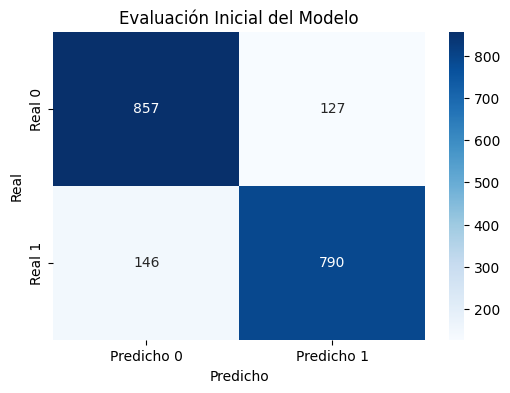

Precisión (Precision): 0.86
Recall: 0.84
F1-Score: 0.85
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       984
           1       0.86      0.84      0.85       936

    accuracy                           0.86      1920
   macro avg       0.86      0.86      0.86      1920
weighted avg       0.86      0.86      0.86      1920

AUC (Área bajo la curva ROC): 0.93


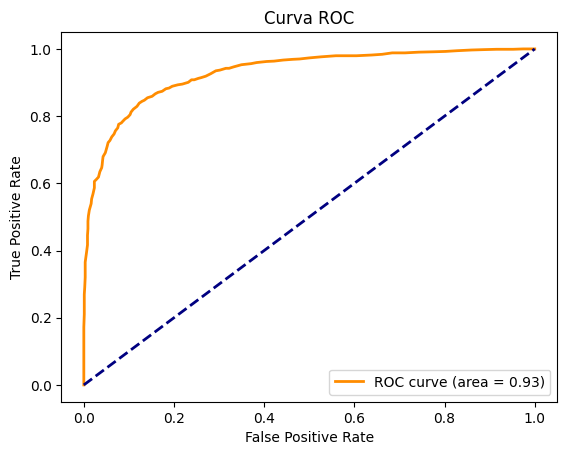

In [569]:
# Obtener probabilidades predichas
y_pred_proba_forest = mod_forest.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

#llamamos a la función
# Evaluar el modelo con probabilidades y curva ROC
evaluar_modelo(Y_test, predic_forest, y_pred_proba_forest=y_pred_proba_forest, titulo="Evaluación Inicial del Modelo")

### Úmbral óptimo

Umbral óptimo: 0.52


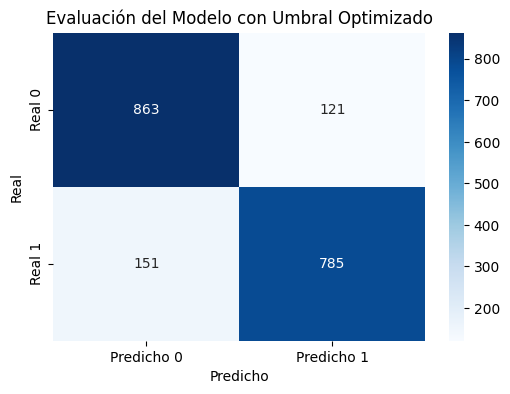

Precisión (Precision): 0.87
Recall: 0.84
F1-Score: 0.85
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       984
           1       0.87      0.84      0.85       936

    accuracy                           0.86      1920
   macro avg       0.86      0.86      0.86      1920
weighted avg       0.86      0.86      0.86      1920

AUC (Área bajo la curva ROC): 0.93


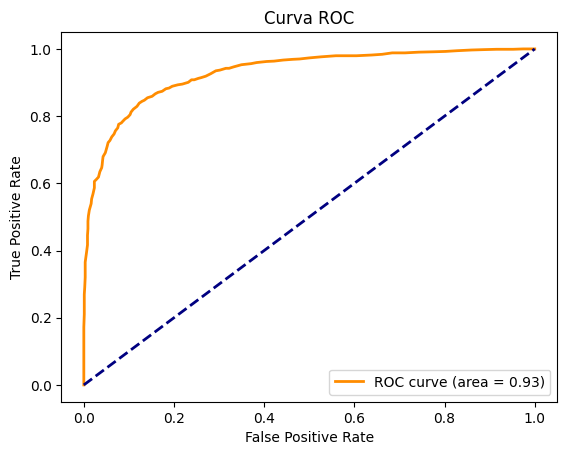

In [570]:
# Calcular fpr, tpr, y thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_forest)

# Encontrar el umbral óptimo (donde TPR - FPR es máximo)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Umbral óptimo: {optimal_threshold}')

# Aplicar el umbral óptimo para clasificar
predic_forest2 = (y_pred_proba_forest >= optimal_threshold).astype(int)

# Evaluar el modelo con el nuevo umbral
evaluar_modelo(Y_test, predic_forest2, y_pred_proba_forest=y_pred_proba_forest, titulo="Evaluación del Modelo con Umbral Optimizado")

In [571]:
pd.crosstab(Y_test, predic_forest2,margins=True, rownames=['Real'],
            colnames={'Predicción Modelo'}).rename(columns={0:'Cumple',1:'Incumple'},
                    index={0:'Cumple',1:'Incumple','All':'Total'}
                                                   )


Predicción Modelo,Cumple,Incumple,All
Real,,,
Cumple,863,121,984
Incumple,151,785,936
Total,1014,906,1920


### Scoring Modelo Ramdom forest

# Evaluación y selección del modelo

In [573]:
print(classification_report(Y_test, predic_logic2))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       984
           1       0.86      0.81      0.84       936

    accuracy                           0.84      1920
   macro avg       0.84      0.84      0.84      1920
weighted avg       0.84      0.84      0.84      1920



In [574]:
print(classification_report(Y_test, predic_arbol2))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       984
           1       0.78      0.79      0.79       936

    accuracy                           0.79      1920
   macro avg       0.79      0.79      0.79      1920
weighted avg       0.79      0.79      0.79      1920



In [575]:
print(classification_report(Y_test, predic_forest2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       984
           1       0.87      0.84      0.85       936

    accuracy                           0.86      1920
   macro avg       0.86      0.86      0.86      1920
weighted avg       0.86      0.86      0.86      1920



In [576]:
perfil = x.iloc[0:1]
perfil

,seniority,time,age,expenses,income,assets,debt,amount,price,home_owner,home_parents,home_private,home_rent,marital_divorced,marital_married,marital_separated,marital_widow,records_no,records_yes,job_fixed,job_freelance,job_partime
0,9,60,30,73,129,0,0,800,846,0,0,0,1,0,1,0,0,1,0,0,1,0


# Implementación del modelo

## Crear perfil de prueba

In [577]:

def crear_fila_dataframe():
    # Diccionario base con todos los campos inicializados a cero
    datos = {
        'seniority': 0.0, 'time': 0.0, 'age': 0.0, 'expenses': 0.0,
        'income': 0.0, 'assets': 0.0, 'debt': 0.0, 'amount': 0.0,
        'price': 0.0,'home_owner': 0.0,'home_parents': 0.0, 'home_private': 0.0,
        'home_rent': 0.0,'marital_married': 0.0, 'marital_separated': 0.0,
        'marital_single': 0.0, 'marital_widow': 0.0,'records_yes': 0.0, 'job_fixed': 0.0,
        'job_freelance': 0.0, 'job_others': 0.0, 'job_partime': 0.0
        }
          # Rellenar los datos mediante input del usuario
    for campo in datos:
        valor = input(f"{campo} (actual: {datos[campo]}): ")
        if valor.strip():  # Si no está vacío, actualizar el valor
            datos[campo] = float(valor)

    # Crear DataFrame con una única fila
    df = pd.DataFrame([datos])
    return df

In [ ]:
# Uso de la función
df_usuario = crear_fila_dataframe()

## Generamos una predicción

In [ ]:
risk_forest = mod_forest.predict_proba(df_usuario)[0][1]
print(f"Score del cliente {(1-risk_forest)*1000:.0f}")

In [ ]:
risk_logic = mod_logic.predict_proba(df_usuario)[0][1]
print(f"Score del cliente {(1-risk_logic)*1000:.0f}")

In [ ]:
risk_arbol = mod_arbol.predict_proba(df_usuario)[0][1]
print(f"Score del cliente {(1-risk_arbol)*1000:.0f}")